In [93]:
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

#SCORE CHECKERS-Classifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

#Model building libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier


#EDA libraries
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform

#Hyperparametertuning libraries
from sklearn.model_selection import GridSearchCV

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")


#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

#Library for saving data
import pickle

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

#show all columns in dataframe
pd.set_option('display.max_columns', None)

df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
print("column names are",df.columns)

print("number of columns are",len(df.columns))

column names are Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')
number of columns are 40


# Data Description

Observations:

1.The dataset has 40 columns

2.There are both categorical and numerical data

3.column names are, 'months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'

# Statistical data analysis

In [4]:
df.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,0.0
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,2,7,14,20,6,NaN,NaN,60,4,4,4,5,7,7,1000,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,2,NaN
top,NaN,NaN,NaN,01-01-2006,OH,250/500,NaN,NaN,NaN,NaN,FEMALE,JD,machine-op-inspct,reading,own-child,NaN,NaN,02-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,4158 Washington Lane,NaN,NaN,?,NaN,NaN,?,NaN,NaN,NaN,NaN,Saab,RAM,NaN,N,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,537,161,93,64,183,NaN,NaN,28,419,292,354,292,262,157,1,NaN,NaN,360,NaN,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,753,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,NaN,NaN,NaN,NaN,NaN,25126.100000,-26793.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.644000,1.83900,NaN,0.992000,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,NaN,NaN,NaN,NaN,NaN,27872.187708,28104.096686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.951373,1.01888,NaN,0.820127,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,NaN,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.00000,NaN,0.000000,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,NaN,NaN,NaN,NaN,NaN,0.000000,-51500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.00000,NaN,0.000000,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,NaN,NaN,NaN,NaN,NaN,0.000000,-23250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,1.00000,NaN,1.000000,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,NaN,NaN,NaN,NaN,NaN,51025.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,3.00000,NaN,2.000000,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN,NaN


Observations:

1.There is no column with single unique values

2.Null values is not present as all of them have 1000 datas

3.Outliers are seen in many columns

labels count: 
  N    753
Y    247
Name: fraud_reported, dtype: int64


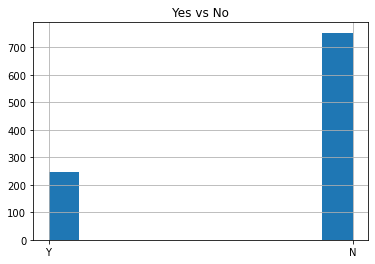

In [5]:
# checking for class imbalance
print("labels count: \n ",df["fraud_reported"].value_counts())

df["fraud_reported"].hist(grid=True)
plt.title("Yes vs No")
plt.show()


class imbalance is present and we would need to balance the class

# Graphical data analysis

In [6]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

#encoding the label  column
df["fraud_reported"]=lab_enc.fit_transform(df['fraud_reported'])
df["fraud_reported"]

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

1 is Yes 

0 is No

In [7]:
# class count
class_count_0, class_count_1 = df['fraud_reported'].value_counts()

#Separate class
class_0 = df[df['fraud_reported'] == 0]
class_1 = df[df['fraud_reported'] == 1]

print('class No/0:', class_0.shape)
print('class Yes/1:', class_1.shape)

class No/0: (753, 40)
class Yes/1: (247, 40)


Highest relationship with the label is seen with vehicle_claim ,total_claim_amount and property_claim

# A.Categorical datas

In [8]:
# a.finding the categorical datas
df.select_dtypes(exclude=["number"]).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


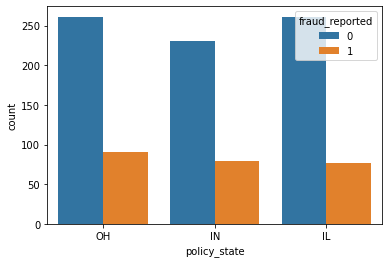

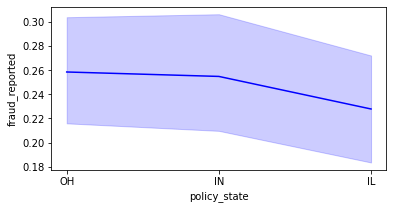

Text(0.5, 1.0, 'policy_state')

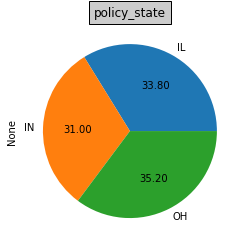

In [9]:
print(df['policy_state'].value_counts())

sns.countplot(x='policy_state', hue='fraud_reported',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="policy_state",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('policy_state').size().plot(kind='pie', autopct='%.2f')
plt.title("policy_state",bbox={'facecolor':'0.8', 'pad':5})

1.Highest frauds are seen in OH and least in IH

2.There almost equal customers from OH,IL and IN

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


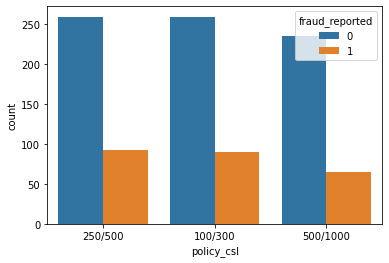

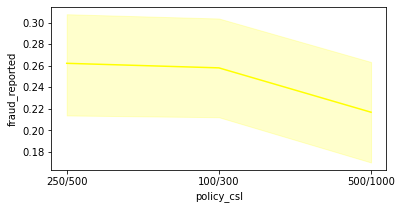

Text(0.5, 1.0, 'policy_csl')

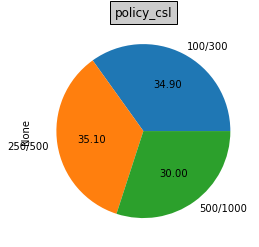

In [10]:
print(df['policy_csl'].value_counts())

sns.countplot(x='policy_csl', hue='fraud_reported',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="policy_csl",y="fraud_reported",data=df, color='yellow')
plt.show()


df.groupby('policy_csl').size().plot(kind='pie', autopct='%.2f')
plt.title("policy_csl",bbox={'facecolor':'0.8', 'pad':5})

Combined single limit (CSL):

CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident

1.The CSL has options of 100/300, 500/1000 and 250/500, where the customers have chosen the 250/500 the most

2.The 250/500 and 100/300 have shown higher frauds as compared to 100/300


FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


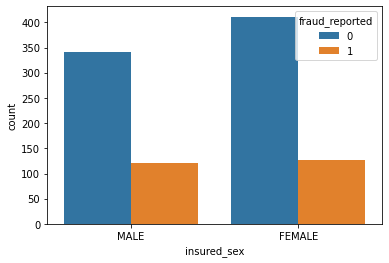

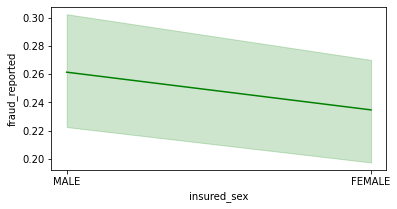

Text(0.5, 1.0, 'insured_sex')

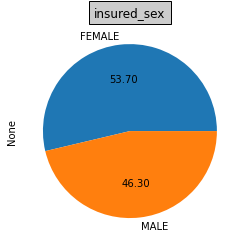

In [11]:
print(df['insured_sex'].value_counts())

sns.countplot(x='insured_sex', hue='fraud_reported',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="insured_sex",y="fraud_reported",data=df, color='green')
plt.show()


df.groupby('insured_sex').size().plot(kind='pie', autopct='%.2f')
plt.title("insured_sex",bbox={'facecolor':'0.8', 'pad':5})

1. There is larger number of females among the customers 

2. Males have shown a higher number of frauds

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


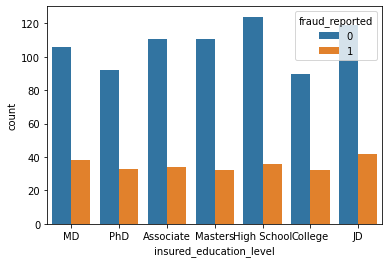

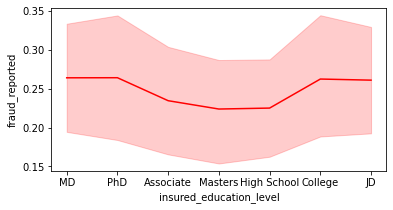

Text(0.5, 1.0, 'insured_education_level')

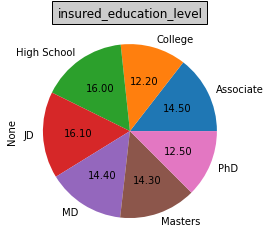

In [12]:
print(df['insured_education_level'].value_counts())

sns.countplot(x='insured_education_level', hue='fraud_reported',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="insured_education_level",y="fraud_reported",data=df, color='red')
plt.show()


df.groupby('insured_education_level').size().plot(kind='pie', autopct='%.2f')
plt.title("insured_education_level",bbox={'facecolor':'0.8', 'pad':5})

1.There is highest number of customers are high school graduates and None

2.Highest percentage of frauds are shown by JD, MD and High school

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


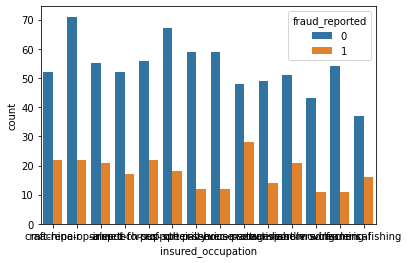

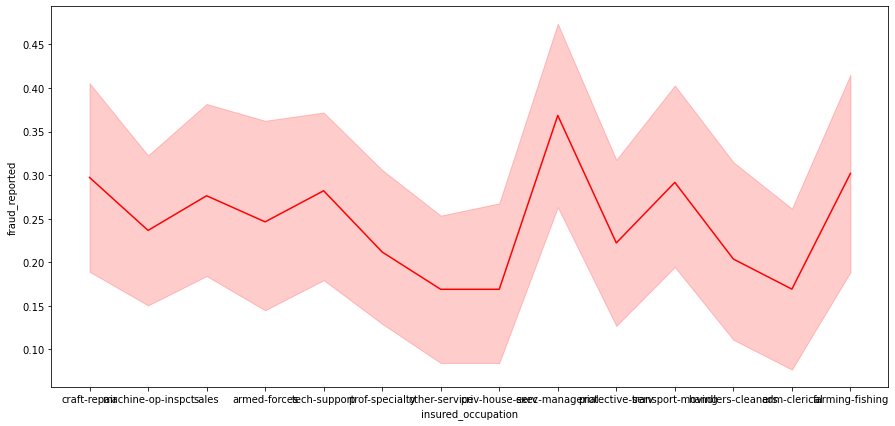

Text(0.5, 1.0, 'insured_occupation')

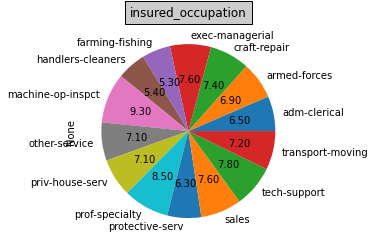

In [13]:
print(df['insured_occupation'].value_counts())

sns.countplot(x='insured_occupation', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(15,7))
sns.lineplot(x="insured_occupation",y="fraud_reported",data=df, color='red')
plt.show()


df.groupby('insured_occupation').size().plot(kind='pie', autopct='%.2f')
plt.title("insured_occupation",bbox={'facecolor':'0.8', 'pad':5})

The largest number of customers are machine operating inspectors and the exec managerial have shown the highest fraud detection

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


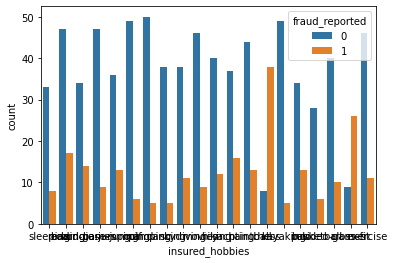

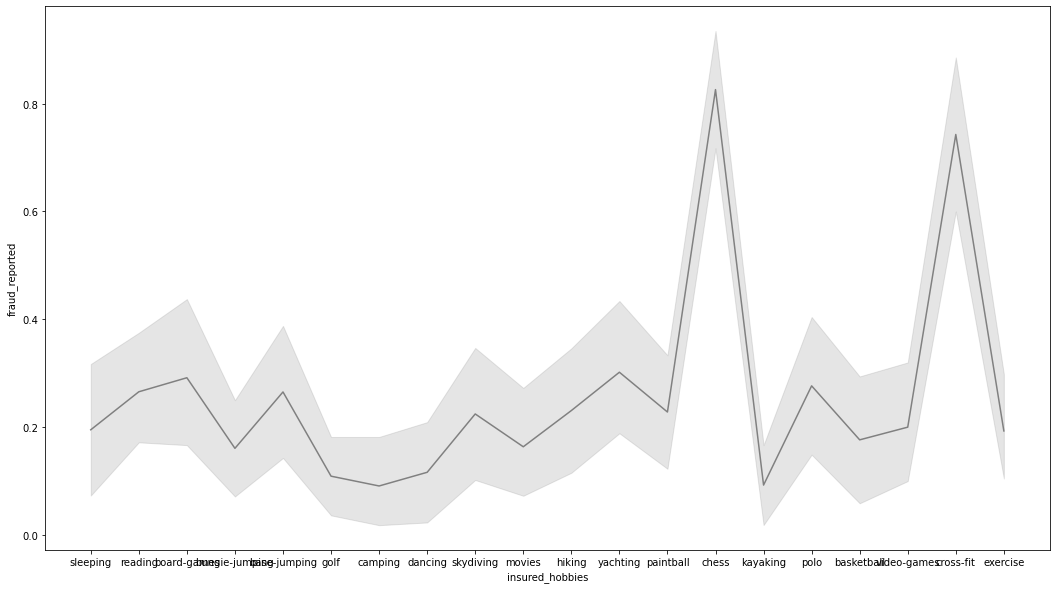

Text(0.5, 1.0, 'insured_hobbies')

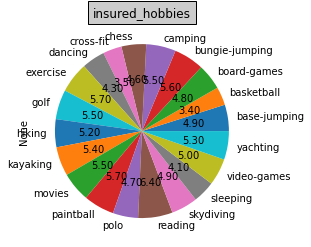

In [14]:
print(df['insured_hobbies'].value_counts())

sns.countplot(x='insured_hobbies', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(18,10))
sns.lineplot(x="insured_hobbies",y="fraud_reported",data=df, color='grey')
plt.show()


df.groupby('insured_hobbies').size().plot(kind='pie', autopct='%.2f')
plt.title("insured_hobbies",bbox={'facecolor':'0.8', 'pad':5})

Customers with hobbies chess and corss fit have shown highest fraud detection

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


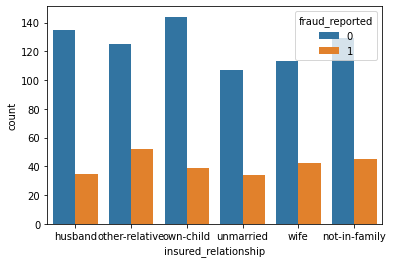

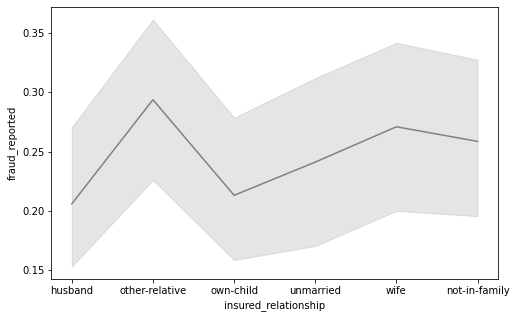

Text(0.5, 1.0, 'insured_relationship')

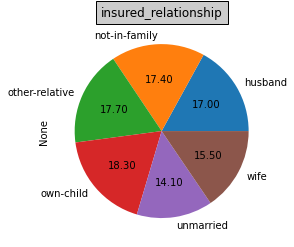

In [15]:
print(df['insured_relationship'].value_counts())

sns.countplot(x='insured_relationship', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="insured_relationship",y="fraud_reported",data=df, color='grey')
plt.show()


df.groupby('insured_relationship').size().plot(kind='pie', autopct='%.2f')
plt.title("insured_relationship",bbox={'facecolor':'0.8', 'pad':5})

1.A code indicating the relationship of the patient to the identified insured is the insured_relationship

2.The highest number of customers were having the insured relationship to be own child

3.The highest frauds were seen where the insured relationship was other relative

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


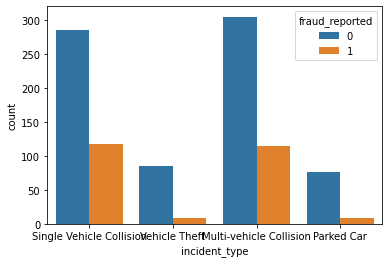

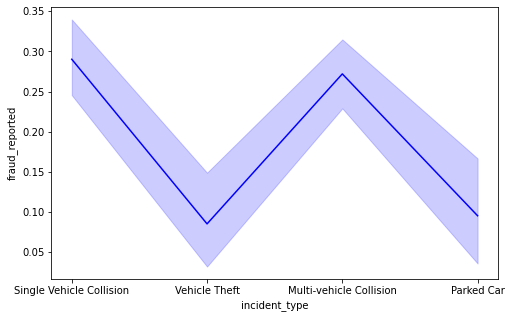

Text(0.5, 1.0, 'incident_type')

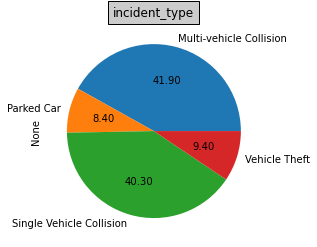

In [16]:
print(df['incident_type'].value_counts())

sns.countplot(x='incident_type', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="incident_type",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('incident_type').size().plot(kind='pie', autopct='%.2f')
plt.title("incident_type",bbox={'facecolor':'0.8', 'pad':5})

1.Highest number of customers faced Multi vehicle collision, followed by single vehicle collision

2.Single vehicle and multi vehicle collision have shown the highest Frauds reported

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


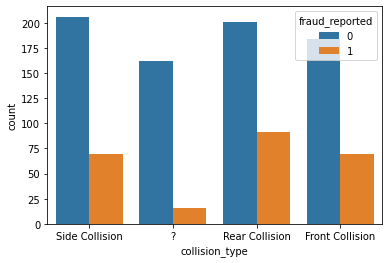

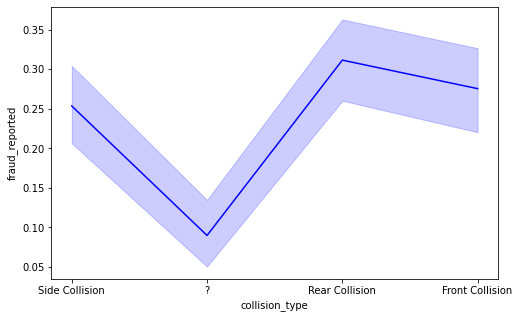

Text(0.5, 1.0, 'collision_type')

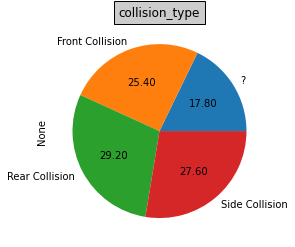

In [17]:
print(df['collision_type'].value_counts())

sns.countplot(x='collision_type', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="collision_type",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('collision_type').size().plot(kind='pie', autopct='%.2f')
plt.title("collision_type",bbox={'facecolor':'0.8', 'pad':5})

Rear and side collission has been the highest where the rear collission has shown the highest frauds

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


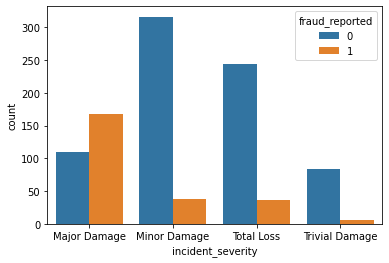

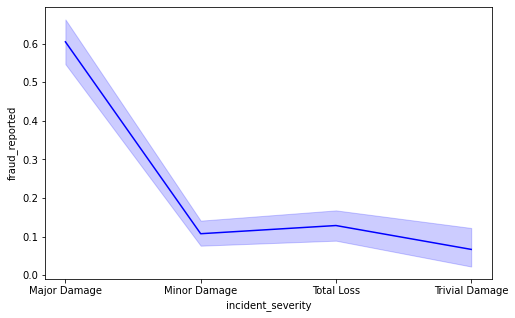

Text(0.5, 1.0, 'incident_severity')

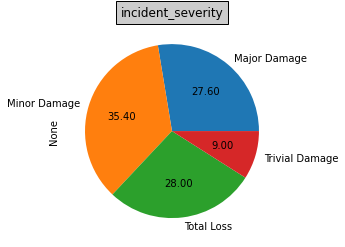

In [18]:
print(df['incident_severity'].value_counts())

sns.countplot(x='incident_severity', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="incident_severity",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('incident_severity').size().plot(kind='pie', autopct='%.2f')
plt.title("incident_severity",bbox={'facecolor':'0.8', 'pad':5})

The highest number of customers faced minor damages, but the customers with major damages were the ones who were reported to be fraud

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


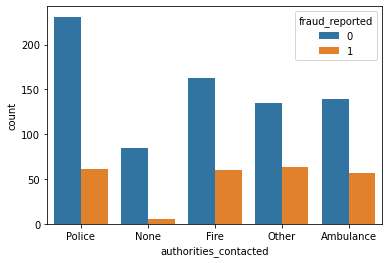

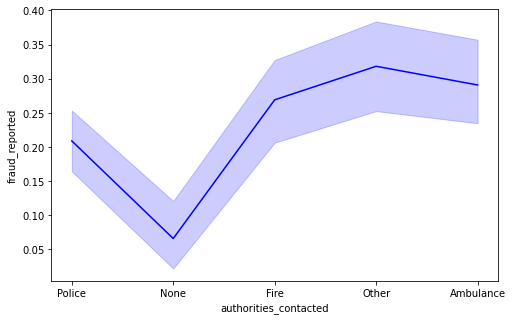

Text(0.5, 1.0, 'authorities_contacted')

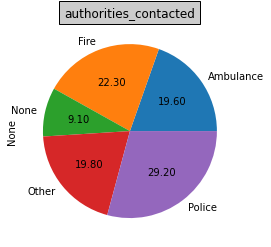

In [19]:
print(df['authorities_contacted'].value_counts())

sns.countplot(x='authorities_contacted', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="authorities_contacted",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('authorities_contacted').size().plot(kind='pie', autopct='%.2f')
plt.title("authorities_contacted",bbox={'facecolor':'0.8', 'pad':5})

The highest frauds were reported by police, but the highest percentage of fraud among those reported were by OthersPolice reported cases shows lower frauds compared to those reported by police

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


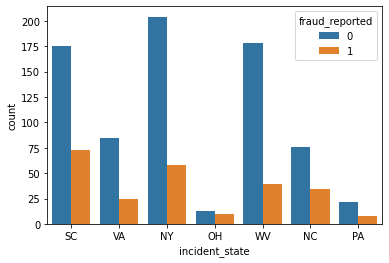

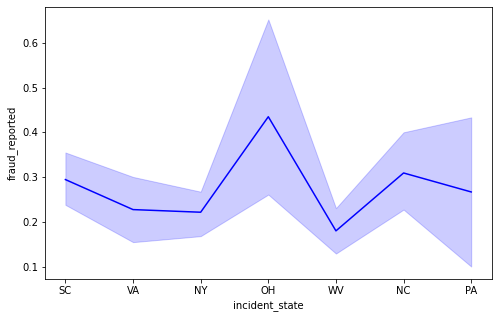

Text(0.5, 1.0, 'incident_state')

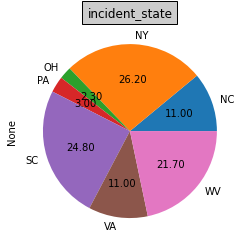

In [20]:
print(df['incident_state'].value_counts())

sns.countplot(x='incident_state', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="incident_state",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('incident_state').size().plot(kind='pie', autopct='%.2f')
plt.title("incident_state",bbox={'facecolor':'0.8', 'pad':5})

Highest incident state was SC

the highest fraud detected were from SC

The highest percentage of those detected were from OH

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


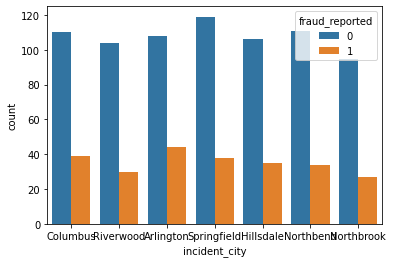

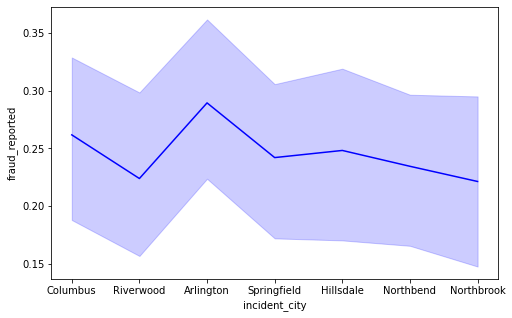

Text(0.5, 1.0, 'incident_city')

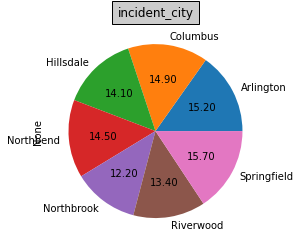

In [21]:
print(df['incident_city'].value_counts())

sns.countplot(x='incident_city', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="incident_city",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('incident_city').size().plot(kind='pie', autopct='%.2f')
plt.title("incident_city",bbox={'facecolor':'0.8', 'pad':5})

1. Largest number of customers were from Arlington and springfield

2.Largest percentage of frauds reported were from arlington

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


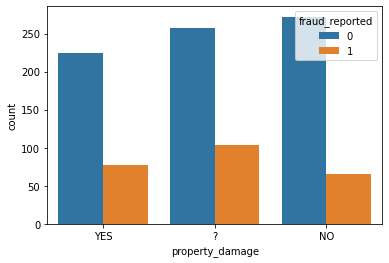

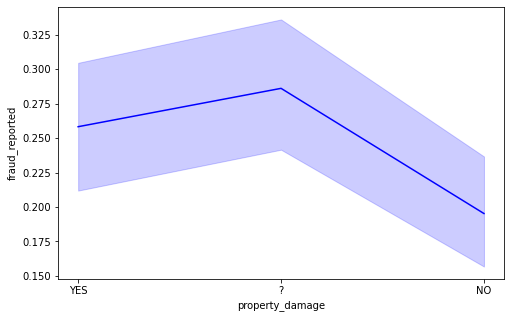

Text(0.5, 1.0, 'property_damage')

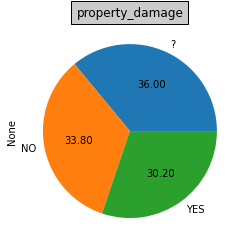

In [22]:
print(df['property_damage'].value_counts())

sns.countplot(x='property_damage', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="property_damage",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('property_damage').size().plot(kind='pie', autopct='%.2f')
plt.title("property_damage",bbox={'facecolor':'0.8', 'pad':5})

Largest is an unamed data 

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


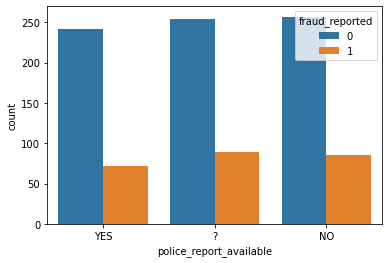

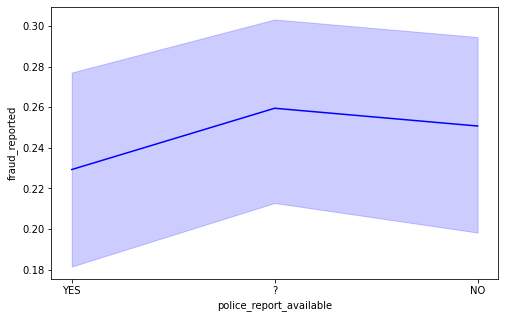

Text(0.5, 1.0, 'police_report_available')

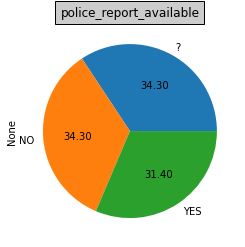

In [23]:
print(df['police_report_available'].value_counts())

sns.countplot(x='police_report_available', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="police_report_available",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('police_report_available').size().plot(kind='pie', autopct='%.2f')
plt.title("police_report_available",bbox={'facecolor':'0.8', 'pad':5})

Largest is unamed data

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


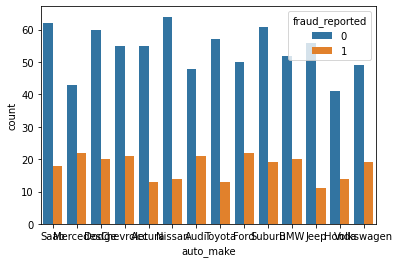

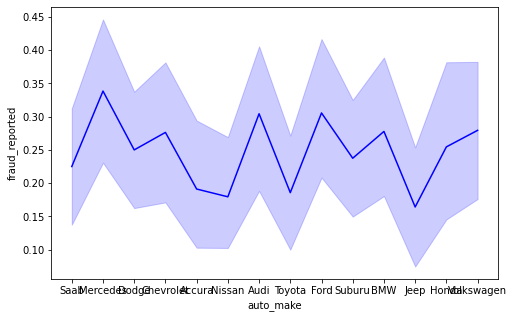

Text(0.5, 1.0, 'auto_make')

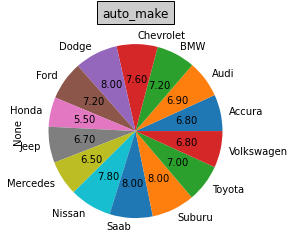

In [24]:
print(df['auto_make'].value_counts())

sns.countplot(x='auto_make', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="auto_make",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('auto_make').size().plot(kind='pie', autopct='%.2f')
plt.title("auto_make",bbox={'facecolor':'0.8', 'pad':5})

The largest frauds are done by customers with Saab

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Forrestor         28
Camry             28
95                27
F150              27
E400              27
93                25
Grand Cherokee    25
Tahoe             24
Escape            24
Maxima            24
Ultima            23
X5                23
Civic             22
Highlander        22
Silverado         22
Fusion            21
Corolla           20
CRV               20
Impreza           20
ML350             20
TL                20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


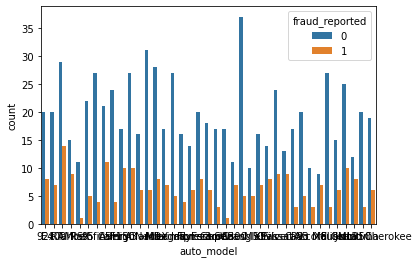

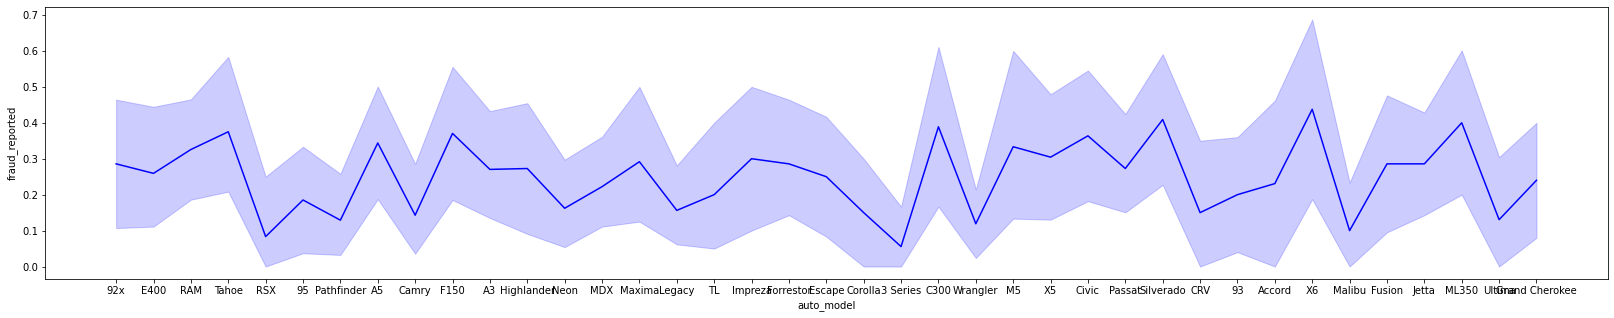

Text(0.5, 1.0, 'auto_model')

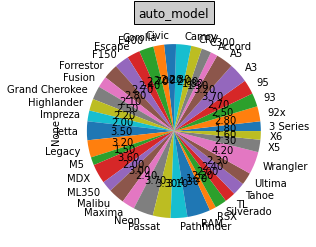

In [25]:
print(df['auto_model'].value_counts())

sns.countplot(x='auto_model', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(28,5))
sns.lineplot(x="auto_model",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('auto_model').size().plot(kind='pie', autopct='%.2f')
plt.title("auto_model",bbox={'facecolor':'0.8', 'pad':5})

Largest frauds are done by X6 auto model

# Numerical values

In [26]:
df.select_dtypes(include=["number"]).columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [27]:
num=df[{"months_as_customer", "age", "policy_number", "policy_deductable","policy_annual_premium", "umbrella_limit","capital-gains", "capital-loss", "incident_hour_of_the_day","number_of_vehicles_involved", "bodily_injuries", "witnesses","total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"}]

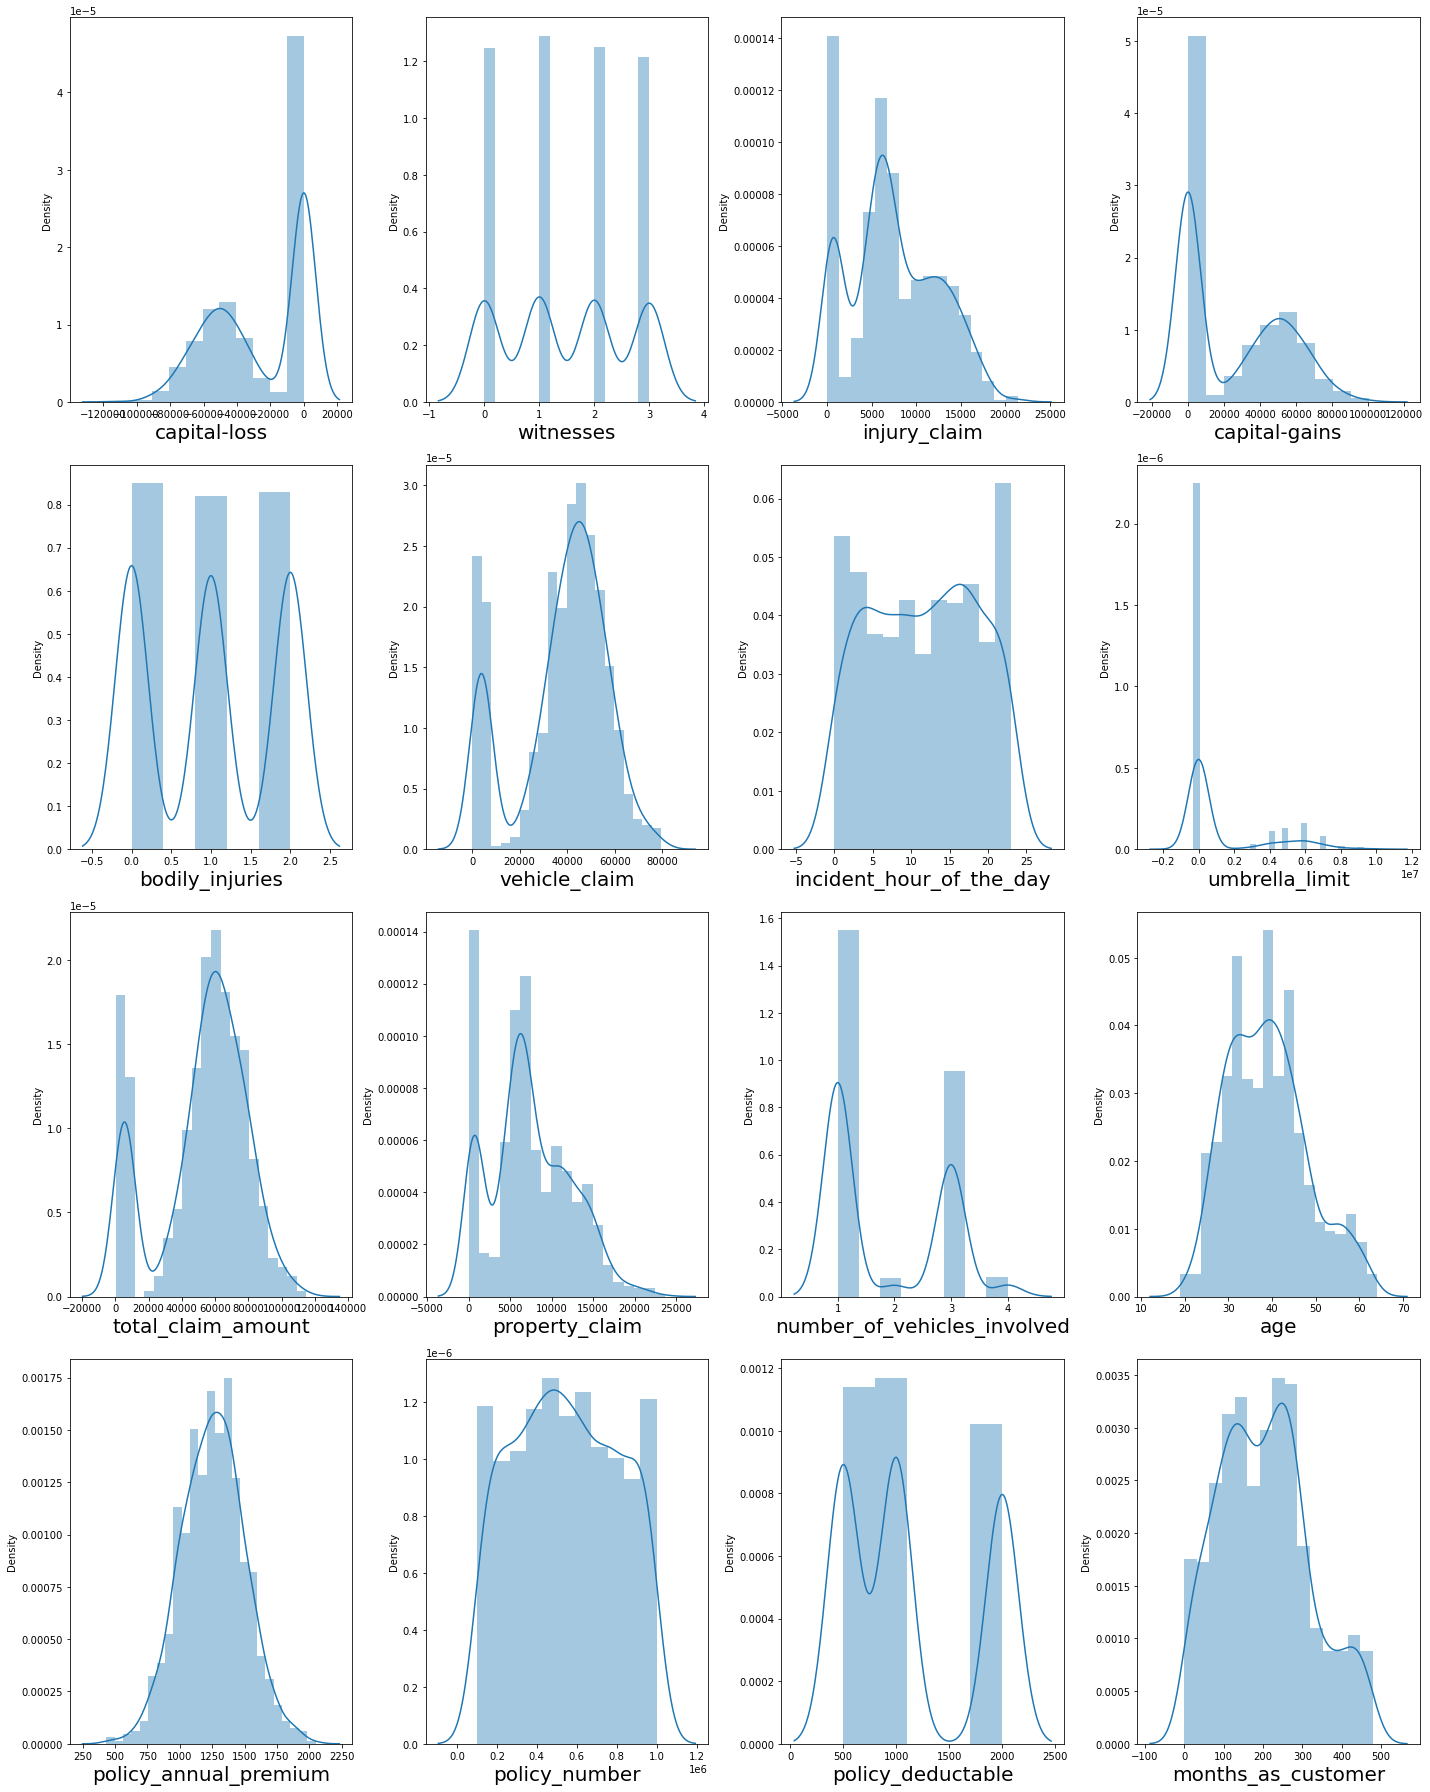

In [28]:
#understanding relationship between features and label
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(num[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

Observations:

1.Age group highest is 40years  

2.Customers mostly have 1 vehicle

3.Mostly people are 100-300 months as customers

4.claims heighest are:
  
  a.injury claim(excluding outliers):rs5000
  
  b.vehicle claim(excluding outliers):rs40000
  
  c.property claim(excluding outliers): rs40000

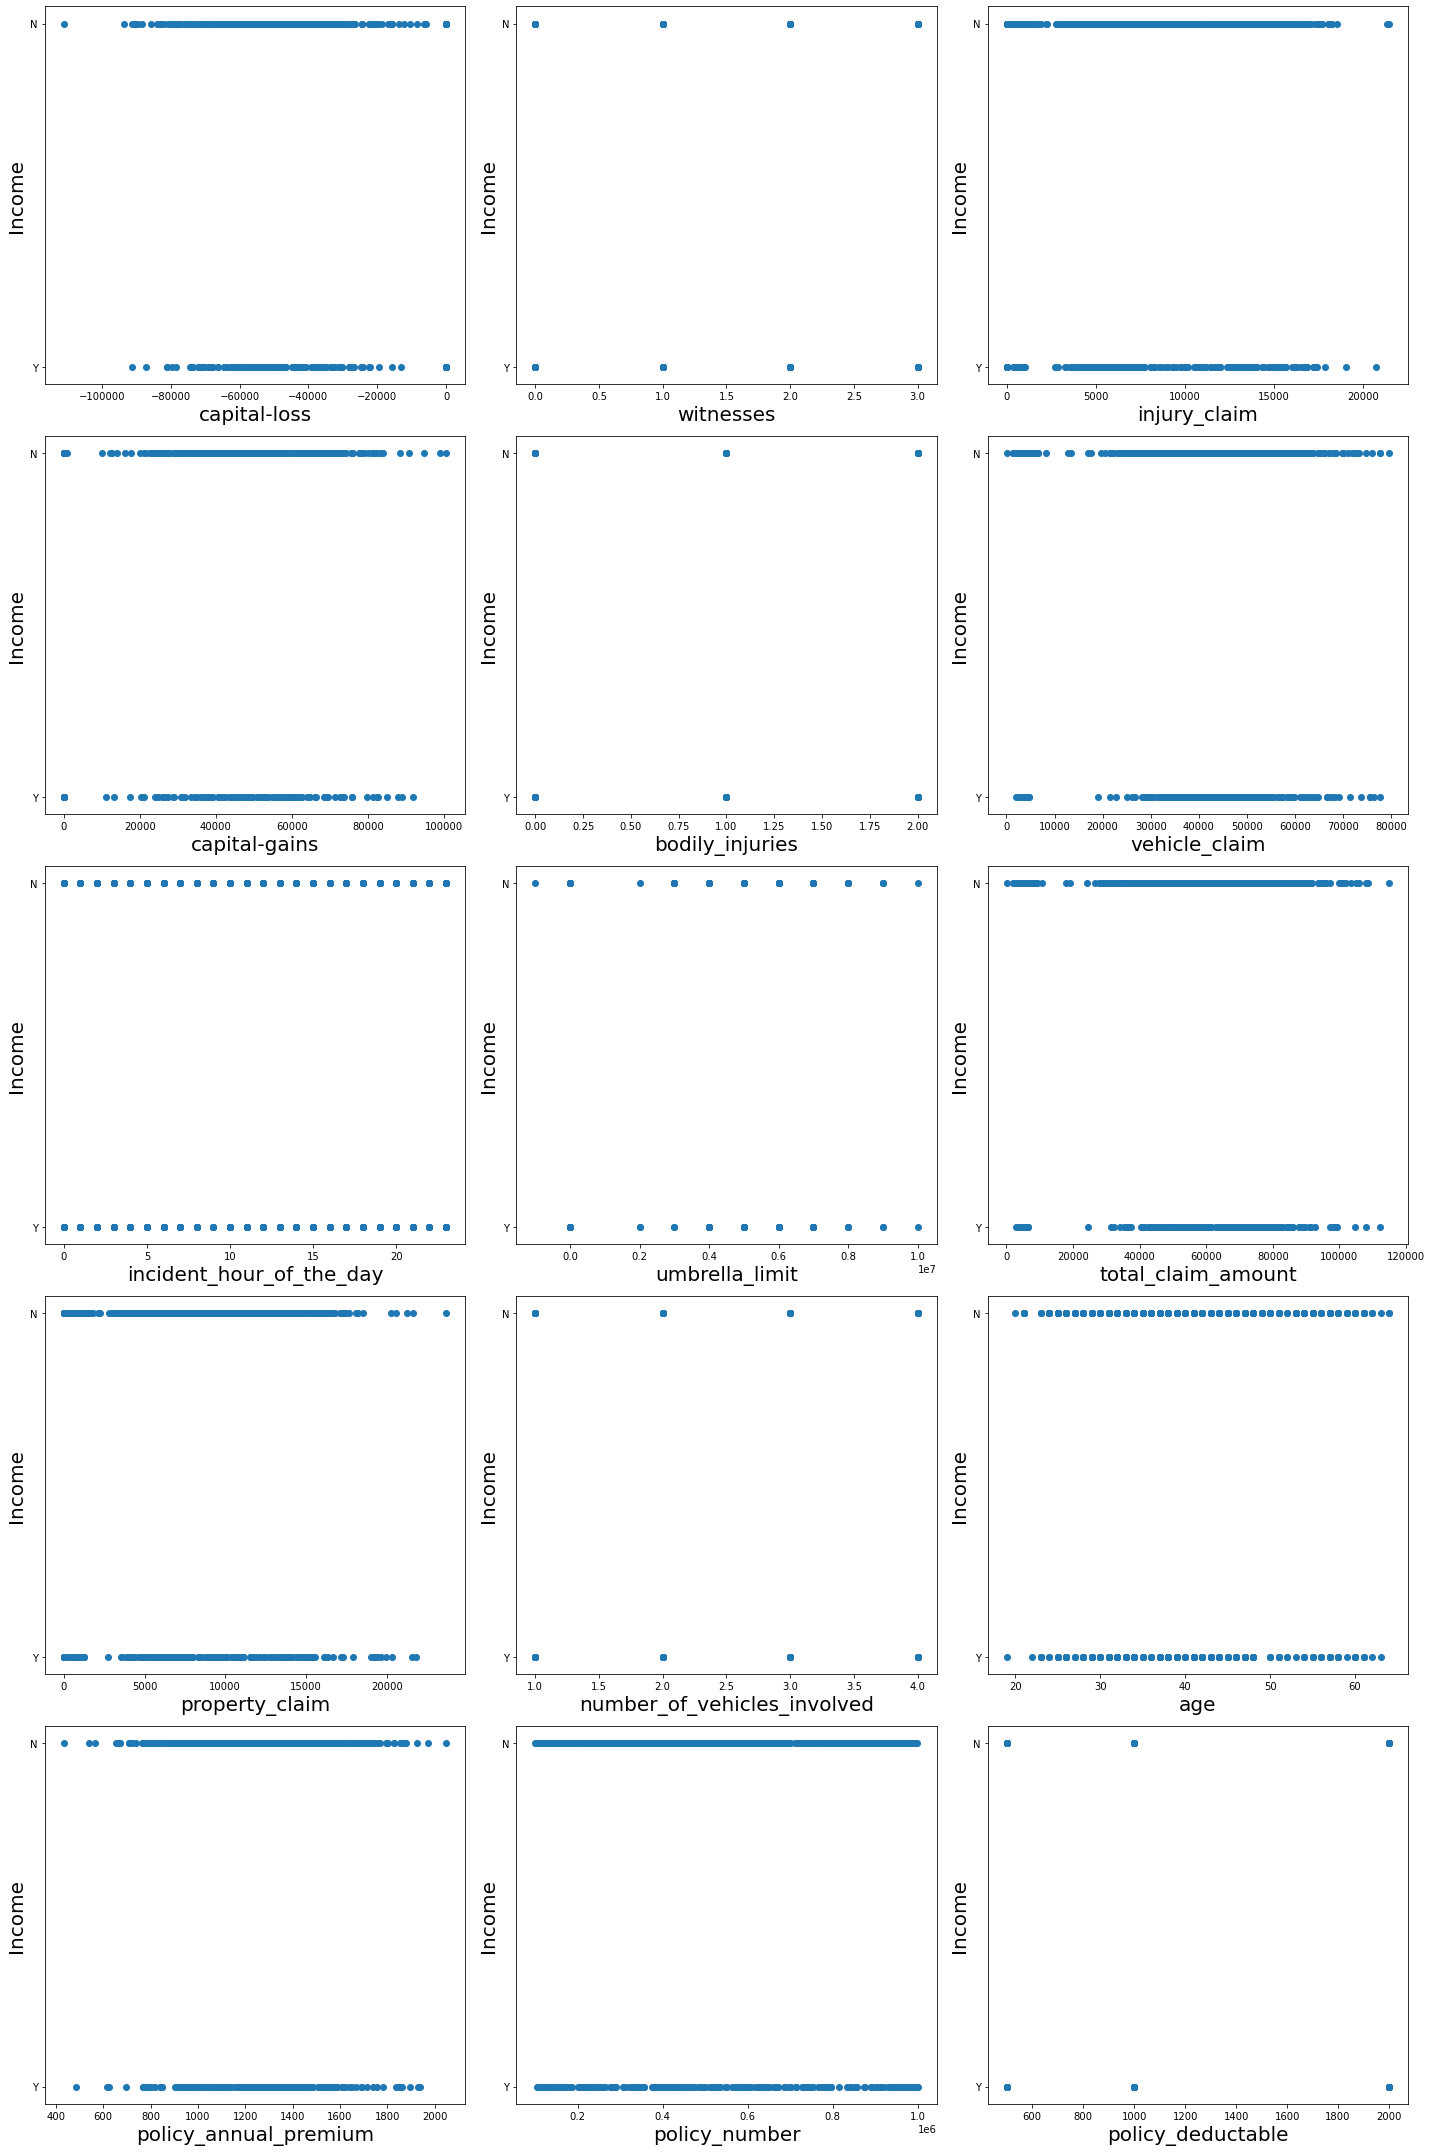

In [29]:
df1=df=pd.read_csv('Automobile_insurance_fraud.csv')
y_table=df1["fraud_reported"]

#visualising the relationship- scatter plot 
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(num[column],y_table)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Income',fontsize=20)
    plotnumber+=1
plt.tight_layout()

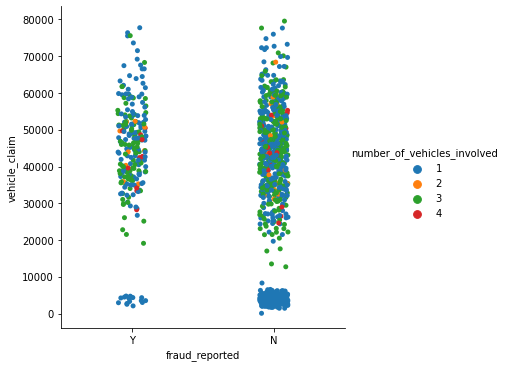

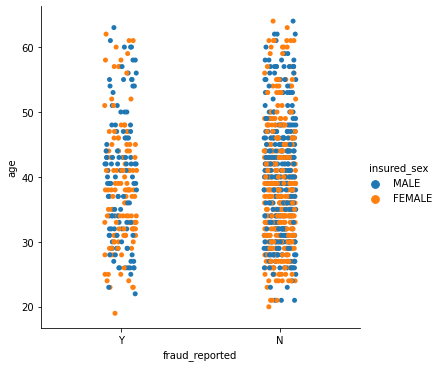

In [30]:
sns.catplot(x="fraud_reported", y="vehicle_claim",hue="number_of_vehicles_involved", data=df1)

sns.catplot(x="fraud_reported", y="age",hue="insured_sex",data=df1)


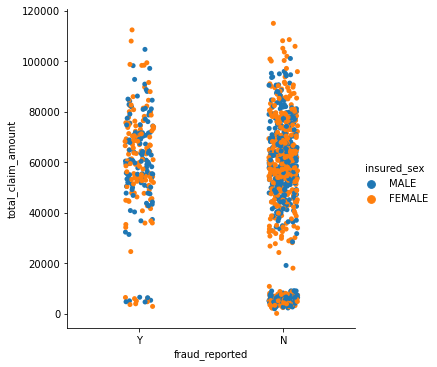

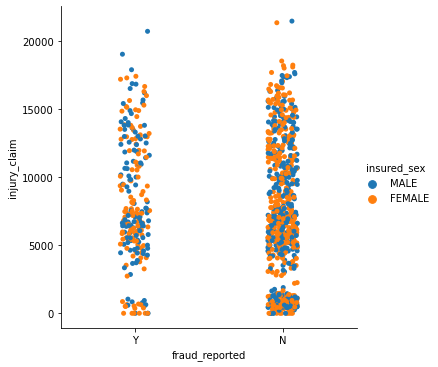

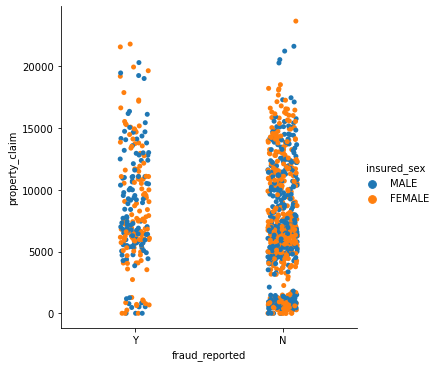

In [31]:
#claims
sns.catplot(x="fraud_reported", y="total_claim_amount",hue="insured_sex", data=df1)

sns.catplot(x="fraud_reported", y="injury_claim",hue="insured_sex", data=df1)

sns.catplot(x="fraud_reported", y="property_claim",hue="insured_sex", data=df1)

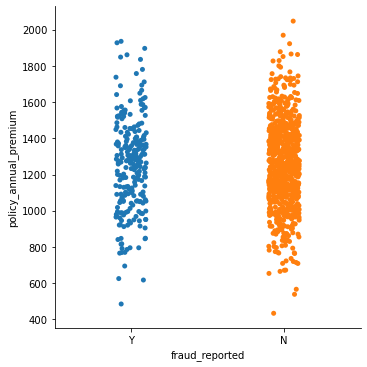

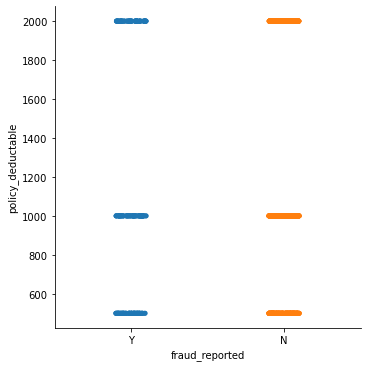

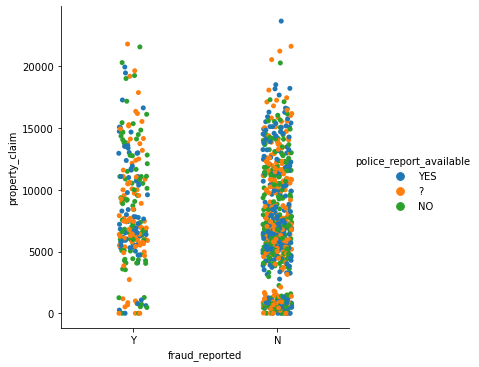

In [32]:
#policy annual premium and policy deductible
sns.catplot(x="fraud_reported", y="policy_annual_premium", data=df1)

sns.catplot(x="fraud_reported", y="policy_deductable", data=df1)

sns.catplot(x="fraud_reported", y="property_claim",hue="police_report_available", data=df1)

Observation:

1.1 and 3 vehicles, between rs3000 and rs6000 of vehicle claims have been detected for fraud

2.Rs5000 to rs6000 for injury claim have been highest to detect fraud

3.Both male and female, between ages 30 to 48 have been highest to detect fraud



# Feature Engineering

In [33]:
print(df['collision_type'].value_counts())

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


In [34]:
#renaming ?
df["collision_type"] = df.collision_type.replace('?', 'Unknown variable')

In [35]:
print(df['property_damage'].value_counts())

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


In [36]:
#renaming ?
df["property_damage"] = df.collision_type.replace('?', 'Yes/No')

In [37]:
print(df['police_report_available'].value_counts())

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


In [38]:
#renaming ?
df["police_report_available"] = df.collision_type.replace('?', 'Yes/No')

In [39]:
#incident_location has 1000 unique values hence dropping it
df.drop(["incident_location"], axis=1,inplace=True)

In [40]:
#breaking down dates
#extracting Date into more usable format
df["day_policy"] = pd.to_datetime(df["policy_bind_date"], format="%d-%m-%Y").dt.day
df["month_policy"] = pd.to_datetime(df["policy_bind_date"], format = "%d-%m-%Y").dt.month
df["year_policy"] = pd.to_datetime(df["policy_bind_date"], format = "%d-%m-%Y").dt.year

## Now we can drop Date as it is of no use
df.drop(["policy_bind_date"], axis = 1, inplace = True)

In [41]:
#breaking down dates
#extracting Date into more usable format
df["day_incident"] = pd.to_datetime(df["incident_date"], format="%d-%m-%Y").dt.day
df["month_incident"] = pd.to_datetime(df["incident_date"], format = "%d-%m-%Y").dt.month
df["year_incident"] = pd.to_datetime(df["incident_date"], format = "%d-%m-%Y").dt.year

## Now we can drop Date as it is of no use
df.drop(["incident_date"], axis = 1, inplace = True)

In [42]:
#Checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                         0
police_report_available     

In [43]:
#dropping_c39 as its fully null values
df.drop(["_c39"], axis=1,inplace=True)

In [44]:
#policy state has 951 unique values, so dropping it
df.drop(["policy_state"], axis=1,inplace=True)

# EDA

# 1.Dealing with continous data

In [45]:
#removing duplicate values
df.drop_duplicates(inplace=True)

In [46]:
#Categorical data
df.select_dtypes(exclude=["number"]).columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [47]:
#numerical data
df.select_dtypes(include=["number"]).columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'day_policy', 'month_policy', 'year_policy',
       'day_incident', 'month_incident', 'year_incident'],
      dtype='object')

In [48]:
num=df[{"months_as_customer", "age", "policy_number", "policy_deductable","policy_annual_premium", "umbrella_limit","capital-gains", "capital-loss", "incident_hour_of_the_day","number_of_vehicles_involved", "bodily_injuries", "witnesses","total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"}]
y=df["fraud_reported"]

In [49]:
num

,capital-loss,witnesses,injury_claim,capital-gains,bodily_injuries,vehicle_claim,incident_hour_of_the_day,umbrella_limit,total_claim_amount,property_claim,number_of_vehicles_involved,age,policy_annual_premium,policy_number,policy_deductable,months_as_customer
0,0,2,6510,53300,1,52080,5,0,71610,13020,1,48,1406.91,521585,1000,328
1,0,0,780,0,0,3510,8,5000000,5070,780,1,42,1197.22,342868,2000,228
2,0,3,7700,35100,2,23100,7,5000000,34650,3850,3,29,1413.14,687698,2000,134
3,-62400,2,6340,48900,1,50720,5,6000000,63400,6340,1,41,1415.74,227811,2000,256
4,-46000,1,1300,66000,0,4550,20,6000000,6500,650,1,44,1583.91,367455,1000,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,17440,0,0,61040,20,0,87200,8720,1,38,1310.80,941851,1000,3
996,0,3,18080,70900,2,72320,23,0,108480,18080,1,41,1436.79,186934,1000,285
997,0,3,7500,35100,2,52500,4,3000000,67500,7500,3,34,1383.49,918516,500,130
998,0,1,5220,0,0,36540,2,5000000,46980,5220,1,62,1356.92,533940,2000,458


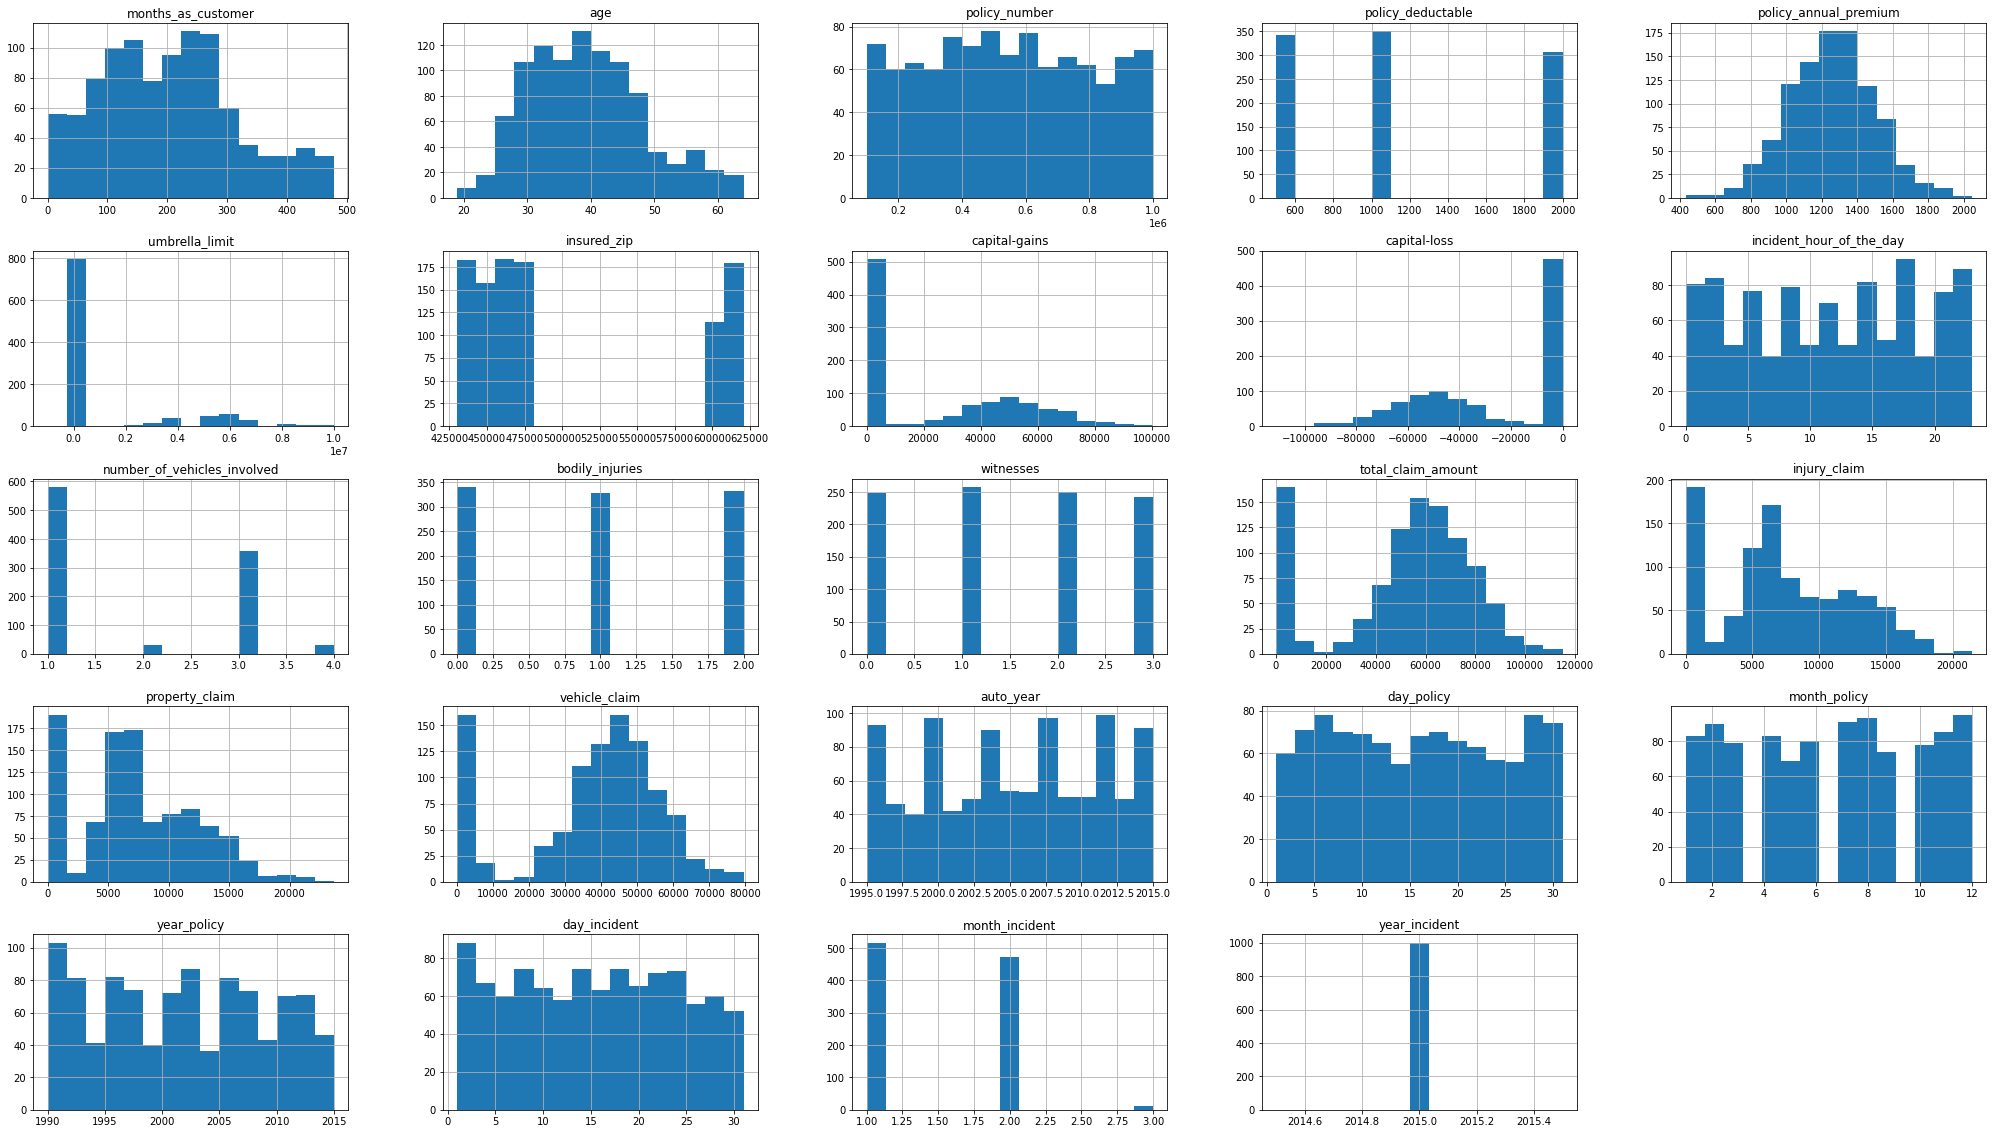

In [50]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

In [51]:
#removing outliers

#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df_new=df[(z<3).all(axis=1)]

print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

columns before applying zscore:  1000
columns after applying zscore:  980


In [52]:
df_new

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day_policy,month_policy,year_policy,day_incident,month_incident,year_incident
0,328,48,521585,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,Side Collision,1,2,Side Collision,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,342868,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Unknown variable,Minor Damage,Police,VA,Riverwood,8,1,Unknown variable,0,0,Unknown variable,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,687698,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,Rear Collision,2,3,Rear Collision,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000,22,2,2015
3,256,41,227811,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,Front Collision,1,2,Front Collision,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,2015
4,228,44,367455,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Unknown variable,Minor Damage,None,NY,Arlington,20,1,Unknown variable,0,1,Unknown variable,6500,1300,650,4550,Accura,RSX,2009,N,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,Front Collision,0,1,Front Collision,87200,17440,8720,61040,Honda,Accord,2006,N,16,7,1991,22,2,2015
996,285,41,186934,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,Rear Collision,2,3,Rear Collision,108480,18080,18080,72320,Volkswagen,Passat,2015,N,5,1,2014,24,1,2015
997,130,34,918516,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,Side Collision,2,3,Side Collision,67500,7500,7500,52500,Suburu,Impreza,1996,N,17,2,2003,23,1,2015
998,458,62,533940,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,Rear Collision,0,1,Rear Collision,46980,5220,5220,36540,Audi,A5,1998,N,18,11,2011,26,2,2015


In [53]:
df=df_new

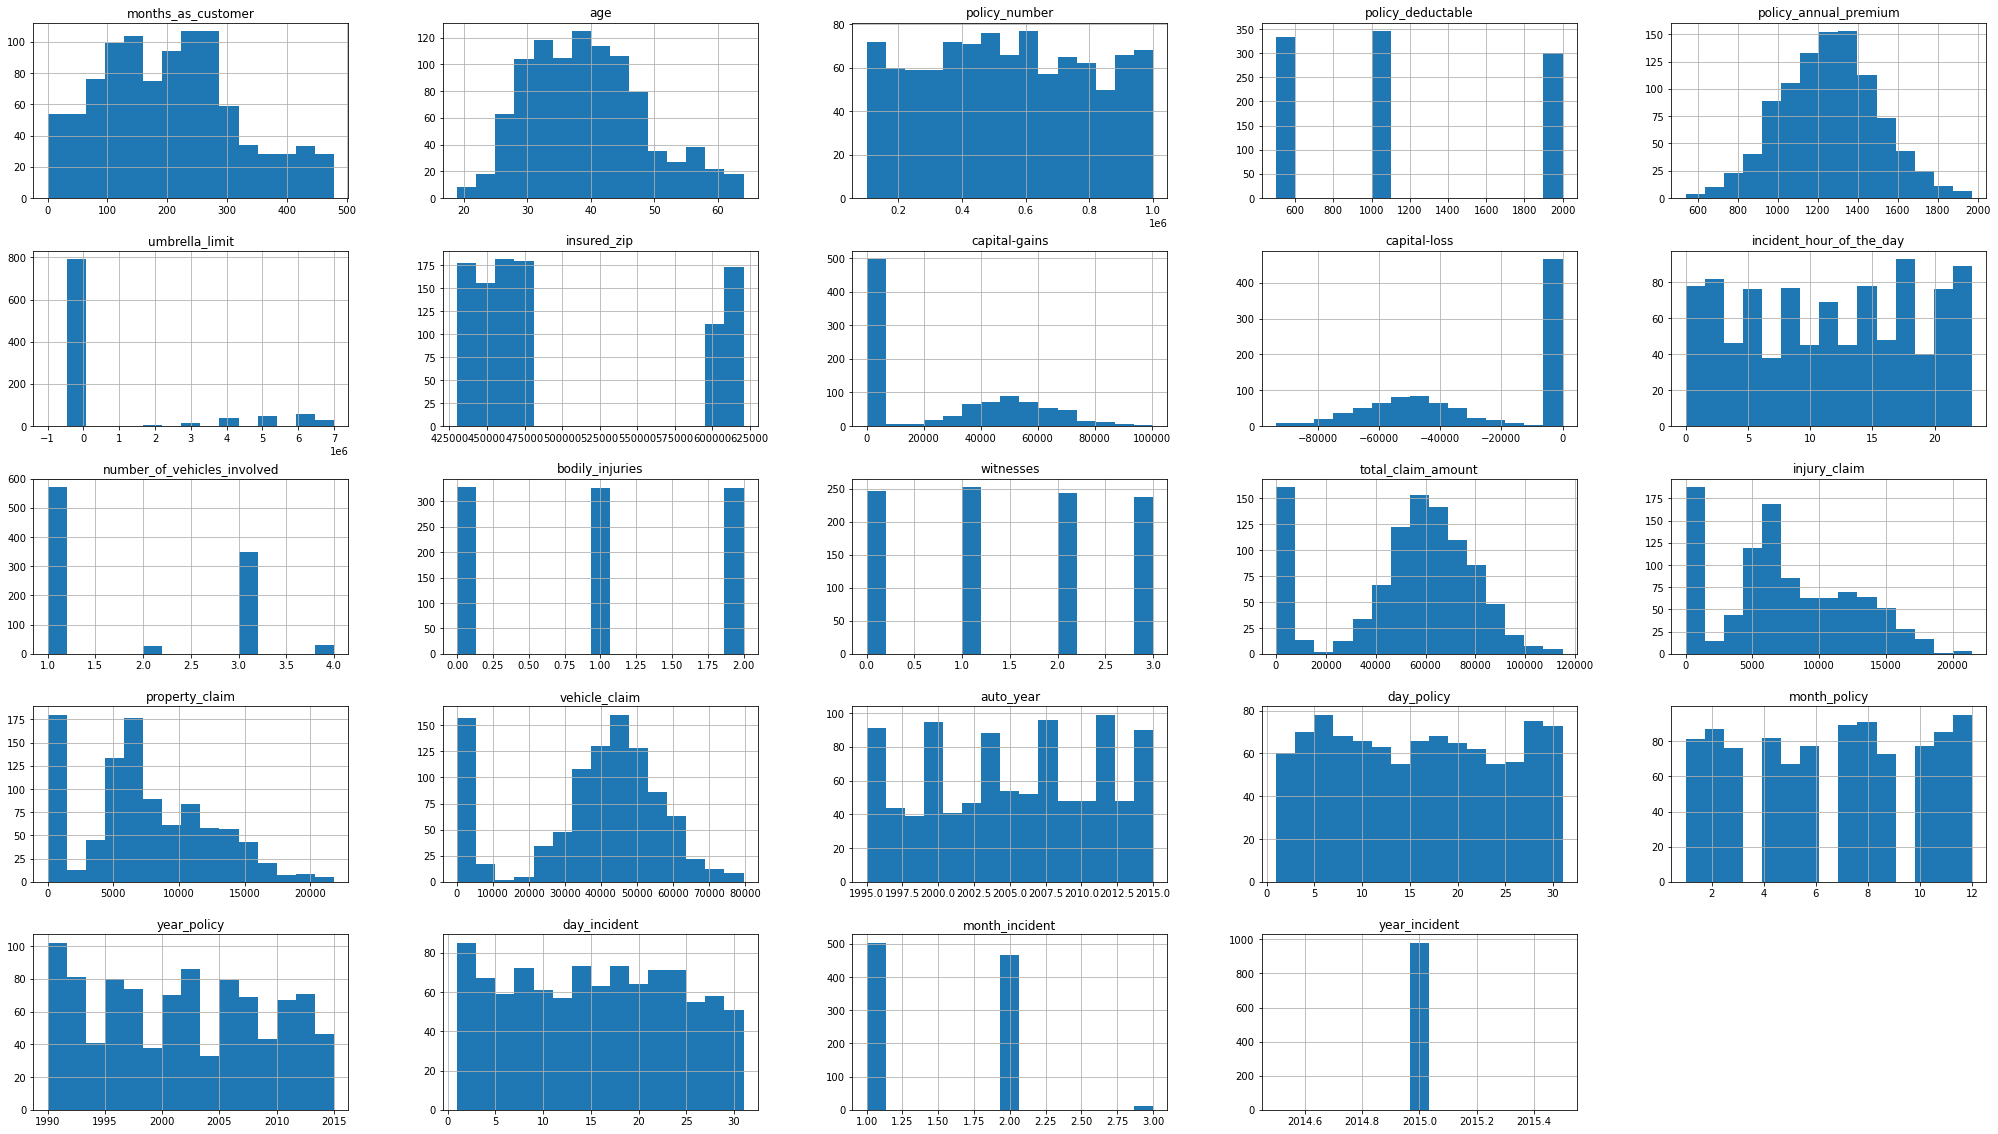

In [54]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()



In [55]:
df

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day_policy,month_policy,year_policy,day_incident,month_incident,year_incident
0,328,48,521585,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,Side Collision,1,2,Side Collision,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,342868,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Unknown variable,Minor Damage,Police,VA,Riverwood,8,1,Unknown variable,0,0,Unknown variable,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,687698,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,Rear Collision,2,3,Rear Collision,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000,22,2,2015
3,256,41,227811,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,Front Collision,1,2,Front Collision,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,2015
4,228,44,367455,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Unknown variable,Minor Damage,None,NY,Arlington,20,1,Unknown variable,0,1,Unknown variable,6500,1300,650,4550,Accura,RSX,2009,N,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,Front Collision,0,1,Front Collision,87200,17440,8720,61040,Honda,Accord,2006,N,16,7,1991,22,2,2015
996,285,41,186934,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,Rear Collision,2,3,Rear Collision,108480,18080,18080,72320,Volkswagen,Passat,2015,N,5,1,2014,24,1,2015
997,130,34,918516,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,Side Collision,2,3,Side Collision,67500,7500,7500,52500,Suburu,Impreza,1996,N,17,2,2003,23,1,2015
998,458,62,533940,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,Rear Collision,0,1,Rear Collision,46980,5220,5220,36540,Audi,A5,1998,N,18,11,2011,26,2,2015


In [56]:
#safety
df_z=df

In [57]:
num=df[{"months_as_customer", "age", "policy_number", "policy_deductable","policy_annual_premium", "umbrella_limit","capital-gains", "capital-loss", "incident_hour_of_the_day","number_of_vehicles_involved", "bodily_injuries", "witnesses","total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"}]
y=df["fraud_reported"]

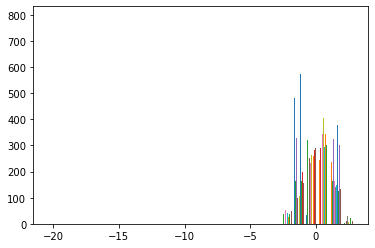

In [58]:
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(num)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

In [59]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform

df_new=power_transform(num)

x_new=pd.DataFrame(df_new,columns=num.columns)

#checking skewness
x_new.skew()

capital-loss                   0.088750
witnesses                     -0.151669
injury_claim                  -0.416732
capital-gains                  0.031294
bodily_injuries               -0.133824
vehicle_claim                 -0.521805
incident_hour_of_the_day      -0.258027
umbrella_limit                -7.932397
total_claim_amount            -0.508540
property_claim                -0.357397
number_of_vehicles_involved    0.372833
age                           -0.002183
policy_annual_premium         -0.007258
policy_number                 -0.161791
policy_deductable              0.022179
months_as_customer            -0.133972
dtype: float64

In [60]:
x_new.head(5)

,capital-loss,witnesses,injury_claim,capital-gains,bodily_injuries,vehicle_claim,incident_hour_of_the_day,umbrella_limit,total_claim_amount,property_claim,number_of_vehicles_involved,age,policy_annual_premium,policy_number,policy_deductable,months_as_customer
0,1.048516,0.523536,0.008582,1.028989,0.094895,0.758130,-0.916935,-0.337086,0.720163,1.089802,-0.839387,1.002330,0.623999,-0.023475,0.063154,1.044541
1,1.048516,-1.406436,-1.522095,-0.986627,-1.264943,-1.787485,-0.447636,1.482455,-1.778146,-1.563723,-0.839387,0.427171,-0.241075,-0.744012,1.271808,0.299045
2,1.048516,1.292411,0.226178,0.955106,1.177809,-0.820246,-0.599018,1.482455,-0.715924,-0.582075,1.194880,-1.136013,0.649541,0.586805,1.271808,-0.515819
3,-1.006291,0.523536,-0.023878,1.013773,0.094895,0.681832,-0.916935,1.788485,0.395030,-0.036218,-0.839387,0.324015,0.660199,-1.263442,1.271808,0.517526
4,-0.941672,-0.348068,-1.300517,1.066686,-1.264943,-1.740862,1.144669,1.788485,-1.730904,-1.628274,-0.839387,0.626869,1.346451,-0.639686,0.063154,0.299045


If score is low, we will add this power transform

# 2. Dealing with categorical data

In [61]:
# a.finding the categorical datas
df.select_dtypes(exclude=["number"]).columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

**Encoding**

In [62]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

#encoding the label  column
df["fraud_reported"]=lab_enc.fit_transform(df['fraud_reported'])
df["fraud_reported"]

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 980, dtype: int32

In [63]:
x=df.drop(["fraud_reported"],axis=1)

#one hot encoding on data
x=pd.get_dummies(x)
x.head(5)

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,day_policy,month_policy,year_policy,day_incident,month_incident,year_incident,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,collision_type_Unknown variable,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_Front Collision,property_damage_Rear Collision,property_damage_Side Collision,property_damage_Unknown variable,police_report_available_Front Collision,police_report_available_Rear Collision,police_report_available_Side Collision,police_report_available_Unknown variable,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,17,10,2014,25,1,2015,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [64]:
len(x.columns)


168

In [65]:
len(x)

980

In [66]:
len(y)

980

# Feature Selection

In [67]:
df["fraud_reported"]

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 980, dtype: int32

In [68]:
#understanding the relationship between independent variable with label
data_corr=df.corr()
data_corr["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170782
total_claim_amount             0.163969
property_claim                 0.139101
injury_claim                   0.088812
day_policy                     0.063858
witnesses                      0.049974
umbrella_limit                 0.044729
number_of_vehicles_involved    0.043535
bodily_injuries                0.039184
months_as_customer             0.021285
policy_deductable              0.015774
age                            0.013279
insured_zip                    0.009699
incident_hour_of_the_day       0.004326
year_policy                    0.003317
auto_year                      0.001152
policy_annual_premium         -0.012686
capital-gains                 -0.014993
capital-loss                  -0.017617
month_incident                -0.030595
month_policy                  -0.032014
policy_number                 -0.036887
day_incident                  -0.059246
year_incident                       NaN


Maximum relation is seen with vehicle_claim ,total_claim_amount and property_claim 

**FEATURE IMPORTANCE**

In [69]:
#finding categorical datas
df.select_dtypes(exclude=["number"]).columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

In [70]:
len(df.columns)

41

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x1=df.drop(columns=["fraud_reported"])
y=df['fraud_reported']

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
x1['policy_csl']= label_encoder.fit_transform(x1['policy_csl'])
x1['insured_sex']= label_encoder.fit_transform(x1['insured_sex'])
x1['insured_education_level']= label_encoder.fit_transform(x1['insured_education_level'])
x1['collision_type']= label_encoder.fit_transform(x1['collision_type'])
x1['incident_severity']= label_encoder.fit_transform(x1['incident_severity'])
x1['authorities_contacted']= label_encoder.fit_transform(x1['authorities_contacted'])
x1['incident_state']= label_encoder.fit_transform(x1['incident_state'])
x1['incident_city']= label_encoder.fit_transform(x1['incident_city'])
x1['property_damage']= label_encoder.fit_transform(x1['property_damage'])
x1['police_report_available']= label_encoder.fit_transform(x1['police_report_available'])
x1['auto_make']= label_encoder.fit_transform(x1['auto_make'])
x1['auto_model']= label_encoder.fit_transform(x1['auto_model'])
x1['insured_occupation']= label_encoder.fit_transform(x1['insured_occupation'])
x1['insured_hobbies']= label_encoder.fit_transform(x1['insured_hobbies'])
x1['insured_relationship']= label_encoder.fit_transform(x1['insured_relationship'])
x1['incident_type']= label_encoder.fit_transform(x1['incident_type'])

x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           980 non-null    int64  
 1   age                          980 non-null    int64  
 2   policy_number                980 non-null    int64  
 3   policy_csl                   980 non-null    int32  
 4   policy_deductable            980 non-null    int64  
 5   policy_annual_premium        980 non-null    float64
 6   umbrella_limit               980 non-null    int64  
 7   insured_zip                  980 non-null    int64  
 8   insured_sex                  980 non-null    int32  
 9   insured_education_level      980 non-null    int32  
 10  insured_occupation           980 non-null    int32  
 11  insured_hobbies              980 non-null    int32  
 12  insured_relationship         980 non-null    int32  
 13  capital-gains       

,Importance
Features,
incident_severity,0.274
insured_hobbies,0.189
insured_zip,0.053
policy_number,0.041
day_incident,0.030
policy_annual_premium,0.026
injury_claim,0.025
property_claim,0.025
age,0.024


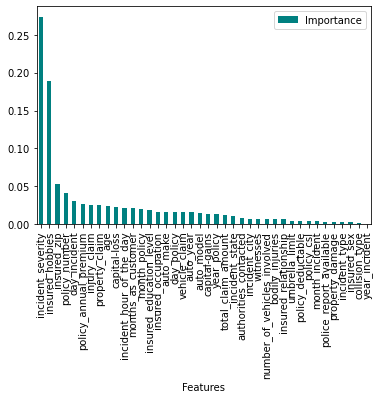

In [72]:

x_train, x_test,y_train, y_test=train_test_split(x1,y,test_size=.25,random_state=199)
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x1.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

Most important features are incident_severity and insured_hobbies

**HeatMap**

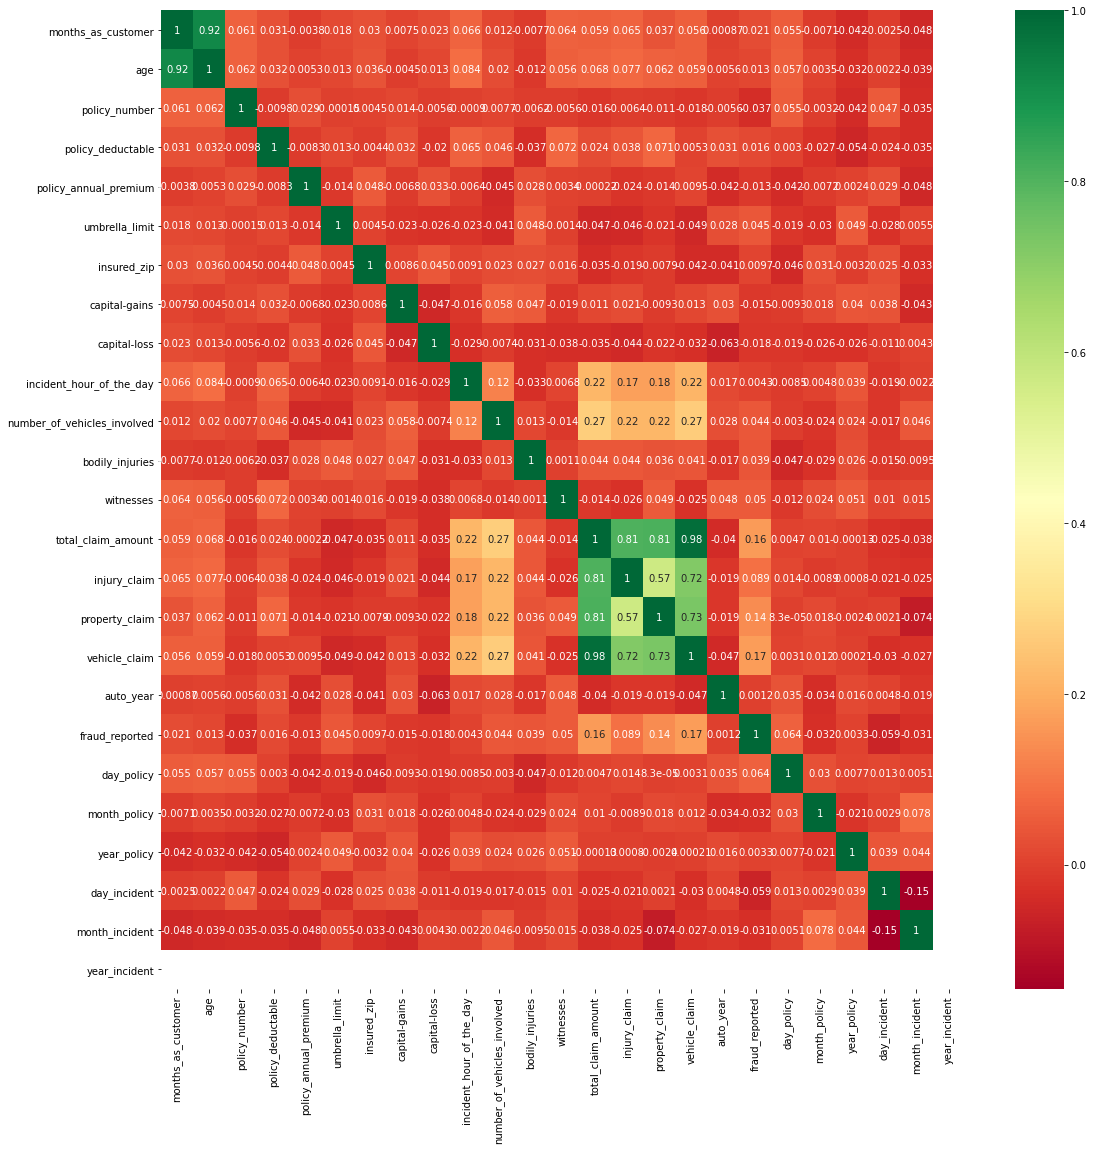

In [73]:

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

1.total claim amount and vehicle claim has high multicollinearity

2.month as customer and age has high multicollineairity

In [74]:
#vif
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(num)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=num.columns
vif

,quality,feature
0,1.010794,capital-loss
1,1.021857,witnesses
2,inf,injury_claim
3,1.012555,capital-gains
4,1.012464,bodily_injuries
5,inf,vehicle_claim
6,1.067899,incident_hour_of_the_day
7,1.009130,umbrella_limit
8,inf,total_claim_amount
9,inf,property_claim


# Reduced order Modelling through PCA

In [75]:
# #standardising the data for PCA

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)

#PCA
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100

var_cumu

array([  5.52496172,   8.17081284,  10.78933563,  12.49873478,
        14.02806578,  15.47745852,  16.91314303,  18.32927163,
        19.73367704,  21.11708471,  22.49070097,  23.85973063,
        25.21061453,  26.55311284,  27.88236139,  29.20681122,
        30.5122357 ,  31.75840799,  32.92491483,  34.01615887,
        35.09085506,  36.12808847,  37.15461034,  38.16489717,
        39.16063331,  40.1467482 ,  41.12436149,  42.08805566,
        43.03683604,  43.9726316 ,  44.90648151,  45.82066753,
        46.71970382,  47.61580148,  48.48812036,  49.35855463,
        50.21129858,  51.06050225,  51.88809364,  52.7109023 ,
        53.52692954,  54.33601195,  55.13932498,  55.9374544 ,
        56.7149453 ,  57.48864822,  58.25592964,  59.02309787,
        59.78317678,  60.53836038,  61.28261408,  62.01676407,
        62.73853773,  63.45635816,  64.16912846,  64.87222886,
        65.56676221,  66.25770613,  66.94275783,  67.62122691,
        68.29304041,  68.96100337,  69.62550054,  70.28

In [76]:
# PCs explaines 95% of the variance?
k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

Number of components explaining 95% variance:  111


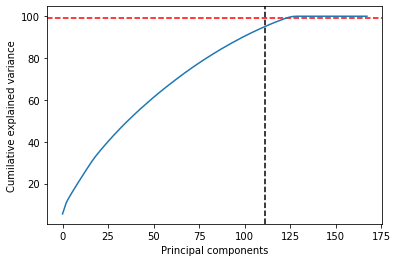

In [77]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=99,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [78]:
# Creating final dataset with 111 columns

FinalPCA=PCA(n_components=111)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110
0,-1.484282,-1.856936,-2.391489,0.837547,3.093530,-1.230076,1.067901,-2.236563,-1.924104,-0.855655,-0.569299,-1.084389,-1.027908,-0.222876,0.832259,-1.602070,-0.404693,2.800108,-0.231109,-0.265591,-3.682953,0.391882,0.048237,1.088057,-2.138898,-1.506150,-1.096855,-0.962151,-0.980697,-0.948616,0.275117,-0.203844,-0.023673,1.843746,-0.459959,-0.564833,-0.267009,-0.309499,-0.031412,0.219990,0.453331,1.071489,-0.253868,-0.371076,-0.396182,0.483689,1.463203,-0.743593,0.169973,-3.306391,0.254571,0.805400,1.741709,1.009132,-1.349286,1.018931,0.625010,-0.276014,-0.023504,-0.547612,-0.721133,0.246334,0.112250,0.881133,-1.001929,2.393670,-0.685239,-0.247868,-1.143968,1.228955,1.259723,-0.748529,-0.793509,0.097351,-0.880958,0.997950,1.781050,-0.782589,-0.909351,0.208049,0.549153,-1.517908,-0.290206,-0.705064,-0.404987,-0.059118,-1.417452,1.332903,-0.529400,-0.596879,0.095234,-0.080793,-0.032759,-0.370569,0.424240,-2.160950,-0.043026,0.425806,0.640772,-0.547114,-0.690130,0.735395,0.653114,-0.349132,-1.815273,1.494260,0.126814,-0.265800,0.791992,0.322949,0.010064
1,5.839173,-0.078496,0.281229,0.837019,4.070580,0.446162,-0.151012,1.401525,1.208964,-0.280386,1.109627,2.328422,0.301121,0.691206,-0.132105,-0.370580,-0.320644,-0.667130,-0.900546,-1.561554,0.023807,0.304691,-1.215997,-1.314922,3.109181,1.043933,-0.645911,1.031864,-0.083674,2.092284,0.941023,0.832783,0.553612,-0.598927,0.594134,-2.362439,-0.464082,-2.341644,0.091007,-0.993558,0.594717,-0.856148,0.882606,0.080543,0.325958,-1.113223,0.329559,1.565860,-0.423345,-1.291329,-0.199106,0.028958,-0.024606,-0.447529,-0.205991,1.243643,0.174348,-0.320396,-0.569783,-0.477878,0.721020,0.054703,-1.824113,-0.096877,0.491496,1.819183,-1.212717,1.320082,-1.021158,0.683978,0.986523,-1.391322,-1.177526,-0.837683,-1.120683,-1.093598,-0.904099,-1.276588,0.431357,1.220005,1.315322,-0.551840,0.559123,-1.198683,0.019388,-0.459936,-0.436275,1.525533,-0.309335,-0.764736,-0.510108,-0.957627,0.354223,0.610308,-0.828068,-0.746134,-1.179719,-1.190325,0.563341,-1.186515,1.978425,-0.634833,0.867423,0.032815,-0.703577,-0.292921,1.795870,1.506005,-2.289203,-1.188539,0.598699
2,-0.182657,3.324542,-0.280238,-2.009515,-0.463129,0.306973,0.369308,1.036988,2.936027,-1.139685,-2.061589,-1.694685,0.128839,-0.517568,0.797364,-0.955934,1.794329,-1.210350,1.481007,-2.035119,-0.010253,0.357448,-0.212055,0.324383,-1.096302,1.231231,-0.384884,1.091045,1.593676,-0.228677,-1.904536,-0.207397,0.535333,1.208684,-2.649707,-0.840937,0.535655,-0.165779,-0.610008,-0.135492,1.805509,1.786811,1.058585,0.639216,-1.063519,-0.057445,-0.196133,0.078206,1.356020,0.069651,-1.164798,0.497730,0.499013,-1.644344,0.818708,-0.144923,-0.839294,1.071244,-0.314126,-1.018215,1.940003,-0.694545,-1.068778,1.251763,0.239890,1.276598,0.489042,-1.354956,0.727492,-0.055003,-0.289083,0.603893,-0.435183,0.334201,0.253626,0.735176,0.066947,0.826078,-0.359030,-0.935534,-0.488150,0.243506,-0.438672,-0.627814,-0.177630,2.159996,-0.278626,0.297621,0.249538,0.047616,-0.352039,0.342466,-0.362003,0.516320,-0.168716,0.119976,-0.196345,-0.704465,1.351118,0.646686,0.018007,1.474529,0.934817,0.675237,1.189772,-0.969744,-0.421550,0.517649,-0.028382,0.169188,-0.407053
3,-0.720320,-0.428044,3.223387,1.303953,-0.443632,2.854839,-1.335394,0.031798,-2.350200,-0.722761,-2.202762,-0.757533,1.565876,0.844932,2.266645,3.766668,1.467985,0.973876,-0.143906,-2.195829,-2.539533,-0.349643,0.150085,1.981997,1.134904,1.311649,-2.882963,1.248754,-0.250217,-0.389481,-1.222615,-1.536941,-1.114867,0.086847,-0.278664,0.398276,0.320409,-1.819126,-0.950550,-1.587875,0.881594,0.637903,2.596599,-2.386941,1.301356,-0.043739,-1.108036,-0.490030,0.525740,-1.979550,-0.01

-ve sign indicates : inverse relationship between factor and variable

In [79]:
x=FinalData2

# Finding best random state

In [80]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)

In [81]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(scaledX,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.8653061224489796 on Random State 80


# Splitting data

In [82]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, Y_train, Y_rem = train_test_split(scaledX,y, train_size=0.8,random_state=80)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

In [83]:
print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)

(784, 111)
(784,)
(98, 111)
(98,)
(98, 111)
(98,)


(None, None)

# Sampling the data to avoid over or underfitting

In [84]:

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [85]:
#handling imbalanced data through smote technique
from collections import Counter
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
oversample = SMOTE()
X_train_SMOTE, Y_train_SMOTE= oversample.fit_resample(X_train, Y_train)


In [86]:
print(Y_train_SMOTE)
print(X_train_SMOTE)

0       1
1       0
2       1
3       0
4       0
       ..
1165    1
1166    1
1167    1
1168    1
1169    1
Name: fraud_reported, Length: 1170, dtype: int32
[[ 0.00623633 -0.54986488 -1.47139645 ... -0.45459838 -2.7364551
   0.07556503]
 [ 2.19605262 -0.18308211  0.03196239 ... -0.68493803  0.66970678
  -1.36712488]
 [-0.86098044 -0.63255772  1.50025318 ...  0.22630983  1.46458126
   1.95727069]
 ...
 [-0.47748458 -0.28034385  1.22569373 ... -0.49600011 -0.54202729
   0.28463585]
 [ 0.10156898 -0.52359353 -0.98272108 ...  0.08620995 -0.52158292
  -1.10215436]
 [-0.65563803 -0.71727271  1.60731495 ... -0.96831724  0.29958018
   0.26544437]]


# Modelling

In [105]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()
LR=LogisticRegression()

models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))
models.append(('LogisticRegression', LR))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.29591836734693877


Cross_Val_Score =  0.7455555555555555


f1_score =  0.29591836734693877


Average precision score =  0.29591836734693877


roc_auc_score =  0.44779116465863444


classification_report
               precision    recall  f1-score   support

           0       0.79      0.23      0.36        83
           1       0.14      0.67      0.22        15

    accuracy                           0.30        98
   macro avg       0.46      0.45      0.29        98
weighted avg       0.69      0.30      0.34        98



[[19 64]
 [ 5 10]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeClassifier ********************************************************


DecisionTreeClassifier(random_state=6)


Accuracy_score =  0.6224489795918368


Cross_Val_Sco

BaggingClassifier()


Accuracy_score =  0.6938775510204082


Cross_Val_Score =  0.7455555555555555


f1_score =  0.6938775510204082


Average precision score =  0.6938775510204082


roc_auc_score =  0.4642570281124498


classification_report
               precision    recall  f1-score   support

           0       0.84      0.80      0.81        83
           1       0.11      0.13      0.12        15

    accuracy                           0.69        98
   macro avg       0.47      0.46      0.47        98
weighted avg       0.72      0.69      0.71        98



[[66 17]
 [13  2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** ExtraTreesClassifier ********************************************************


ExtraTreesClassifier()


Accuracy_score =  0.826530612244898


Cross_Val_Score =  0.7355555555555555


f1_score =  0.826530612244898


Average precision score =  0.826530612244898


roc_auc_score =  0.5425702811244979


classification_rep

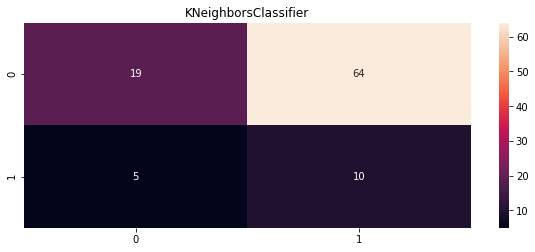

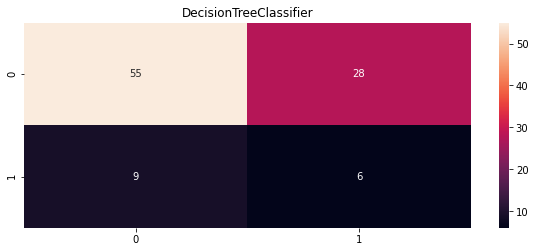

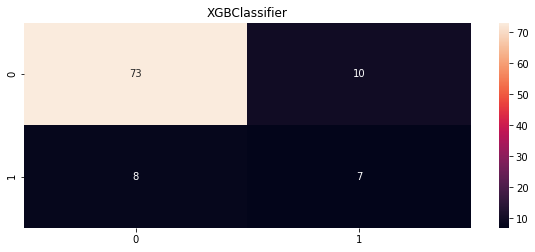

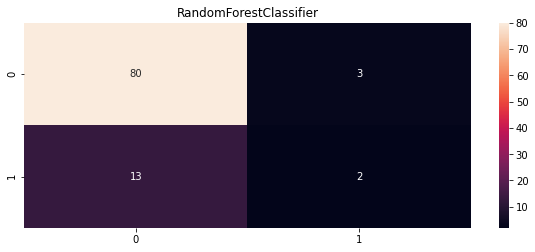

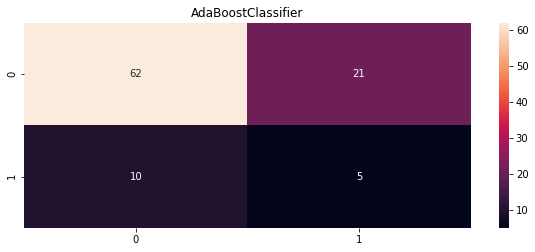

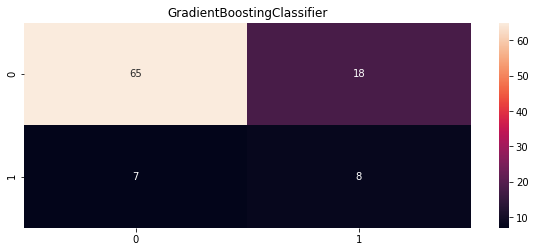

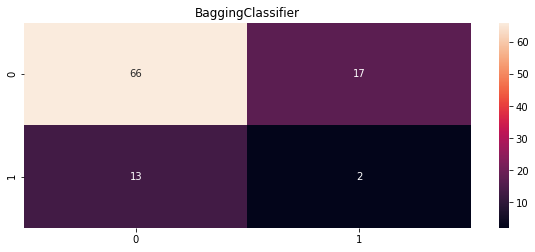

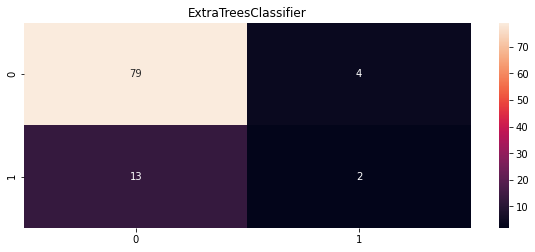

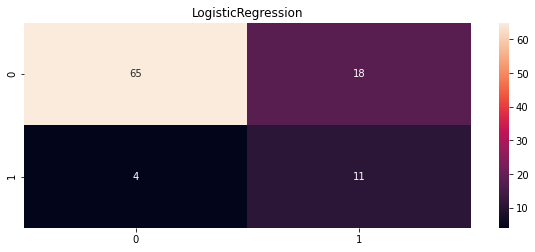

In [106]:
Model= []
score= []
cvs=[]
rocscore=[]
f1_scores=[]
avg_precision_score=[]
difference=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(X_train_SMOTE,Y_train_SMOTE)
    print(model)
    pre=model.predict(X_test)
    print('\n')
    
    AS=accuracy_score(Y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    
    sc= cross_val_score(model, X_valid,Y_valid, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    
    f1=f1_score(Y_test,pre)
    print('f1_score = ',AS)
    f1_scores.append(f1*100)
    print('\n')
    
    aps=average_precision_score(Y_test,pre)
    print('Average precision score = ',AS)
    avg_precision_score.append(aps*100)
    print('\n')
    
    false_positive_rate, true_positive_rate,thresolds= roc_curve(Y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    print('classification_report\n',classification_report(Y_test,pre))
    print('\n')
    
    cm=confusion_matrix(Y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')
    diff=AS-sc
    difference.append(diff)

In [107]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs,'difference between a and c':difference,'roc_score':rocscore,'f1 score':f1_scores,'Average precision score':avg_precision_score})
result

,Model,Accuracy_score,Cross_val_score,difference between a and c,roc_score,f1 score,Average precision score
0,KNeighborsClassifier,29.591837,74.555556,-0.449637,44.779116,22.471910,14.111050
1,DecisionTreeClassifier,62.244898,58.222222,0.040227,53.132530,24.489796,16.242497
2,XGBClassifier,81.632653,72.555556,0.090771,67.309237,43.750000,27.378952
3,RandomForestClassifier,83.673469,73.555556,0.101179,54.859438,20.000000,18.598639
4,AdaBoostClassifier,68.367347,67.444444,0.009229,54.016064,24.390244,16.614338
5,GradientBoostingClassifier,74.489796,67.444444,0.070454,65.823293,39.024390,23.553114
6,BaggingClassifier,69.387755,74.555556,-0.051678,46.425703,11.764706,14.668815
7,ExtraTreesClassifier,82.653061,73.555556,0.090975,54.257028,19.047619,17.709751
8,LogisticRegression,77.551020,76.666667,0.008844,75.823293,50.000000,31.897725


# ROC AUC curve

AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



[15:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)





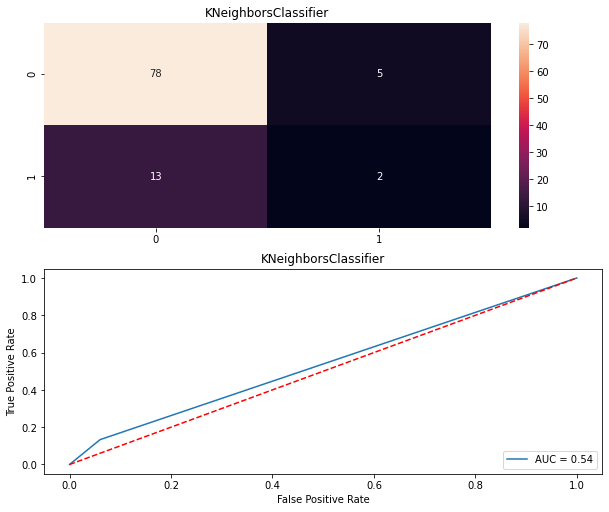

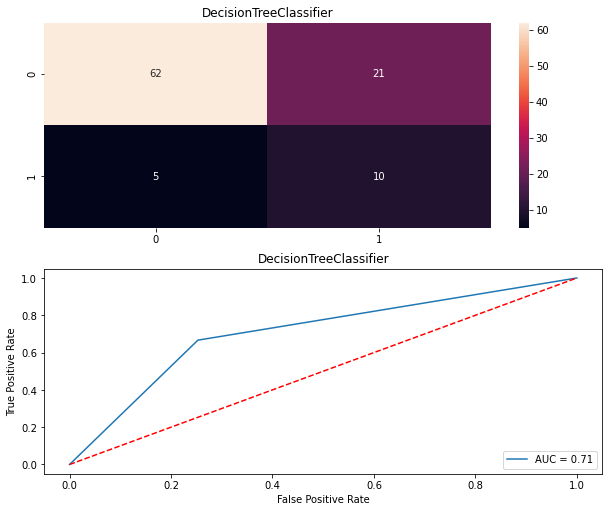

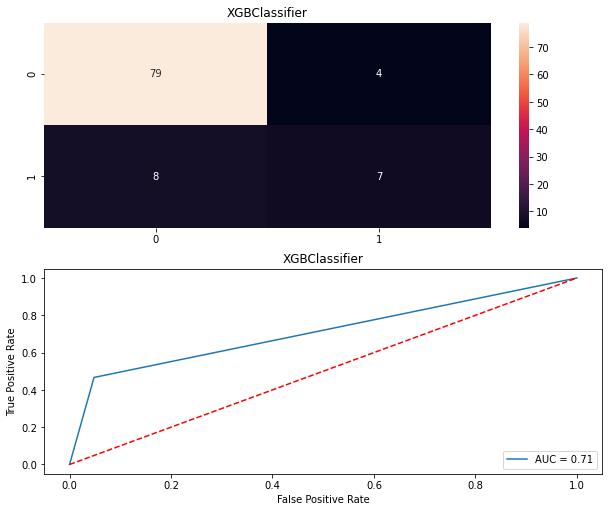

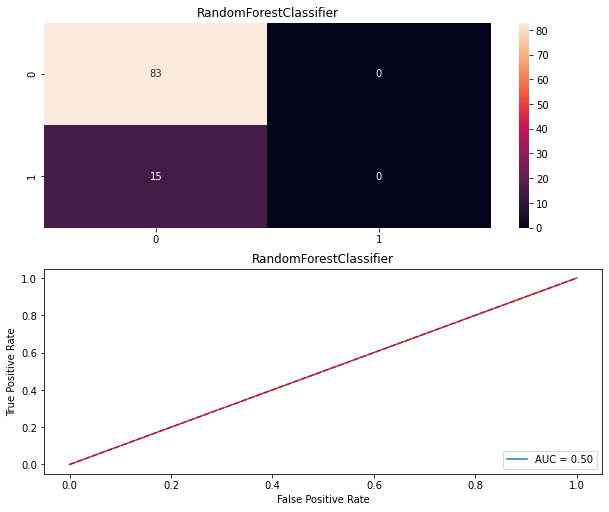

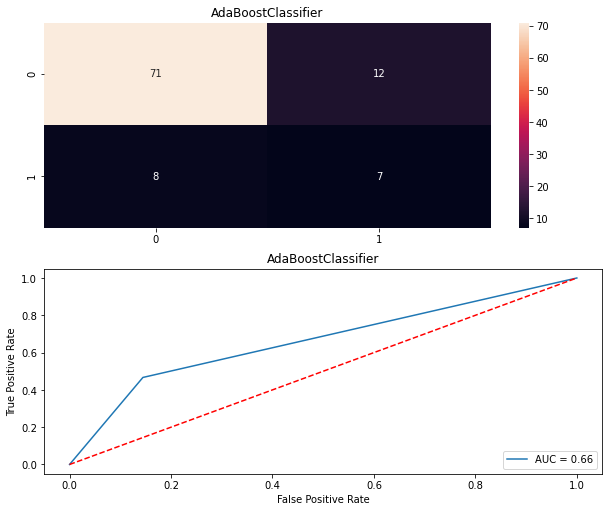

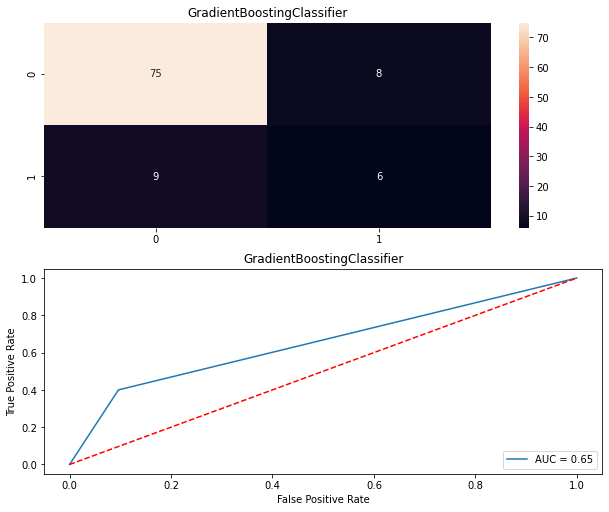

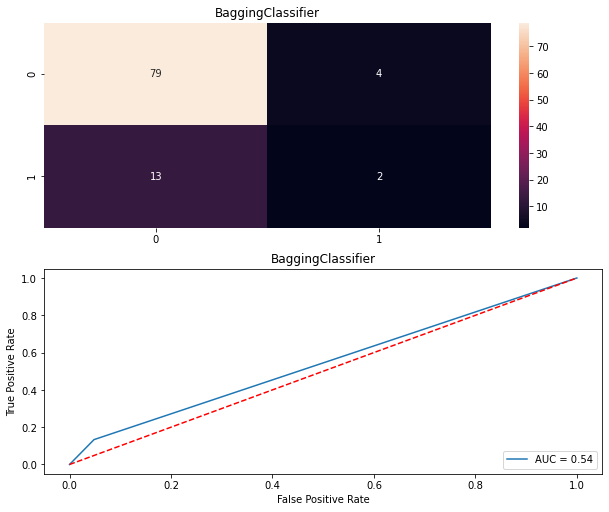

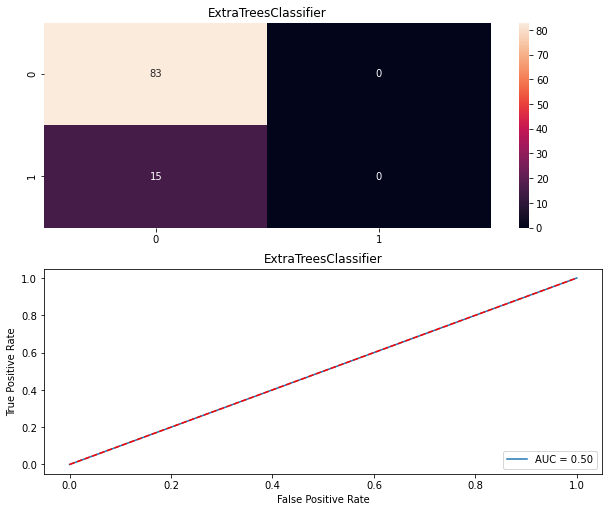

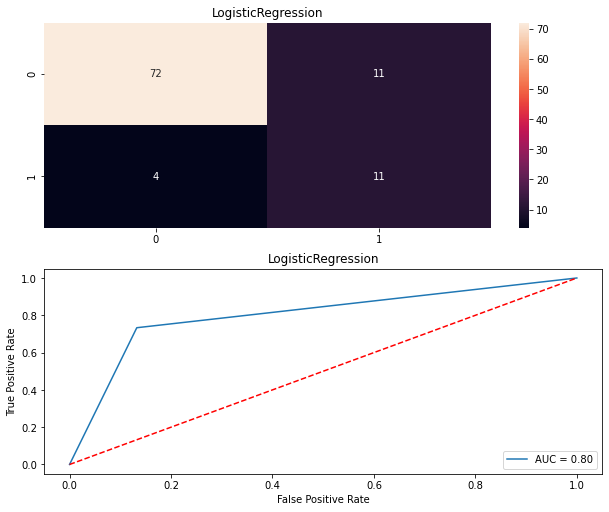

In [108]:
for name,model in models:
    model.fit(X_train,Y_train)
    pre=model.predict(X_test)

    false_positive_rate, true_positive_rate,thresolds= roc_curve(Y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    
    cm= confusion_matrix(Y_test,pre)
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

# Best model chosen

RandomForestClassifier is chosen as the best model as it has the highest accuracy and low difference with the cross validation score

# Hyperparameter tuning

In [109]:
#HyperParameter tuning
from sklearn.model_selection import GridSearchCV 
paramters={'n_estimators':[2,3,4,5],
           'criterion':['gini','entropy'],
           'min_samples_split':[2,3,4,5],
           'min_samples_leaf':[2,3,4,5,6],
           'max_leaf_nodes':[2,3,4,5,10],
}

GCV=GridSearchCV(RandomForestClassifier(),paramters,cv=5)

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [2, 3, 4, 5]})

In [110]:
GCV.best_params_

{'criterion': 'gini',
 'max_leaf_nodes': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 2}

In [114]:
Final_model=RandomForestClassifier(criterion='gini',max_leaf_nodes=5,min_samples_leaf=2,min_samples_split=5,n_estimators=2)

In [115]:
#training
Final_model.fit(X_train,Y_train)

#predicting
pred=Final_model.predict(X_test)

#finding scores
Accuracy_Score_final=(accuracy_score(Y_test,pred))*100
cross_val_score_final= (cross_val_score(Final_model, X_test,Y_test, cv=10, scoring='accuracy').mean())*100
false_positive_rate, true_positive_rate,thresolds= roc_curve(Y_test,pre)
roc_auc_final=auc(false_positive_rate,true_positive_rate)
f1_final=f1_score(Y_test,pre)
aps_final=average_precision_score(Y_test,pre)

#printing scores
print("Accuracy score of final model:",Accuracy_Score_final)
print("Cross validation score of final model:",cross_val_score_final)
print("ROC AUC score of final model:",roc_auc_final)
print("f1 score of final model:",f1_final)
print("average precision score of final model:",aps_final)

Accuracy score of final model: 78.57142857142857
Cross validation score of final model: 78.66666666666667
ROC AUC score of final model: 0.8004016064257028
f1 score of final model: 0.5945945945945945
average precision score of final model: 0.4074829931972789


In [116]:
#Making it a dataframe
score_final_model=[Accuracy_Score_final]
cvs_final_model=[cross_val_score_final]
rocscore_final_model=[roc_auc_final]
f1_score_final=[f1_final]
aps_score_final=[aps_final]

print("Score of the finalized model:")
final_model_scores=data = pd.DataFrame({'Accuracy score':score_final_model,'cross validation score':cvs_final_model,'ROC Score':rocscore_final_model,'f1 score':f1_final,'Average precision score':aps_score_final})

from IPython.display import HTML
HTML(final_model_scores.to_html(index=False))

Score of the finalized model:


Accuracy score,cross validation score,ROC Score,f1 score,Average precision score
78.571429,78.666667,0.800402,0.594595,0.407483


-------------------------------------------------------------------------------------MODEL BUILT----------------------------------------------------------------